In [1]:
import numpy as np
import mltools as ml
from logisticClassify2 import *
import matplotlib.pyplot as plt

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.rescale(X) # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

## Q1. scatter plot

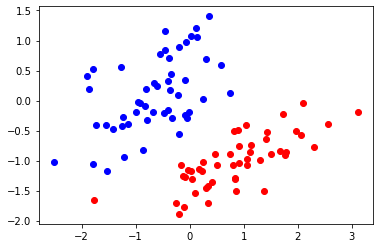

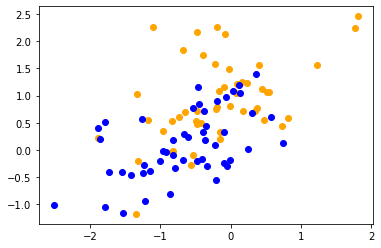

In [3]:
# classify btwn class 0&1,  linearly separable
plt.scatter(XA[YA==0,0], XA[YA==0,1],color='red')
plt.scatter(XA[YA==1,0], XA[YA==1,1],color='blue')
plt.show()

#classify btwn class 1&2, not linearly separable
plt.scatter(XB[YB==2,0], XB[YB==2,1],color='orange')
plt.scatter(XB[YB==1,0], XB[YB==1,1],color='blue')
plt.show()

## Q2. 

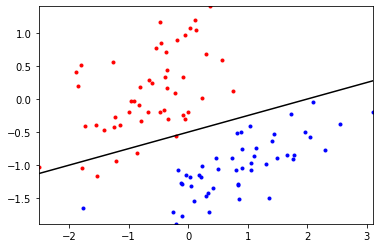

In [4]:
#Q2
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
theta0,theta1,theta2=np.array([0.5,-0.25,1])
wts = np.array([theta0,theta1,theta2]); # TODO: fill in values
learner.theta = wts; # set the learner’s parameters
learner.plotBoundary(XA, YA)


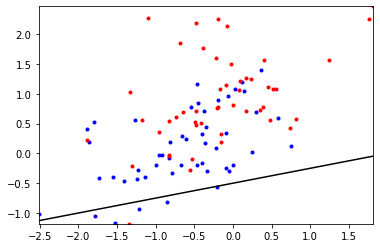

In [5]:
learner2 = logisticClassify2(); # create "blank" learner
learner2.classes = np.unique(YB) # define class labels using YA or YB
learner2.theta = wts; # set the learner’s parameters
learner2.plotBoundary(XB, YB)

## Q3.

In [6]:
# learner.classes = [0,1]
learner.err(XA,YA)

0.050505050505050504

In [7]:
# learner2.classes = [1,2]
learner2.err(XB,YB)

0.5454545454545454

## Q4. plotClassify2D

D:\UCIcourse\ML\hw3\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


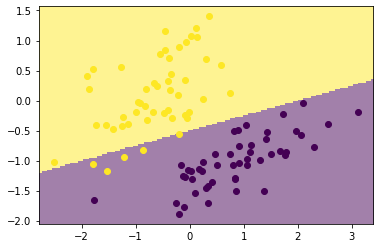

In [8]:
ml.plotClassify2D(learner, XA, YA)

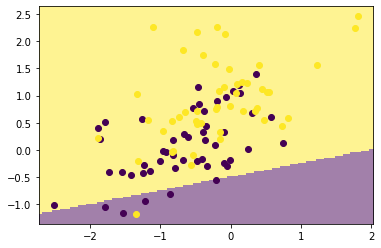

In [9]:
ml.plotClassify2D(learner2, XB, YB)

## Q5.
let $r = \theta_0 + \theta_1 \times x_1 + \theta_2 \times x_2 , k=0 or 1 or 2 $

$$\frac{dJ(\theta)}{d\theta_k} = -y^j\cdot \frac{1}{\sigma (r)}\cdot \frac{d\sigma (r)}{d\theta} - (1-y)\frac{1}{1-\sigma (r)}\cdot \frac{-d\sigma(r)}{d\theta}$$

$$= -(y^j\cdot \frac{1}{\sigma(r)} - (1-y^j)\cdot \frac{1}{1-\sigma(r)}) \cdot \frac{d\sigma (r)}{d\theta}$$

$$= -(y^j\cdot \frac{1}{\sigma(r)} - (1-y^j)\cdot \frac{1}{1-\sigma(r)}) \cdot \sigma(r)\cdot (1-\sigma(r)) \cdot \frac{dr}{d\theta}$$

$$= -(y^j\cdot (1-\sigma(r)) - (1-y^j)\sigma(r))\cdot \frac{dr}{d\theta}$$

$$= -(y^j-y^j\sigma(r) -\sigma(r) + y^j\sigma(r))x_k = -(y^j-\sigma(r))x_k = (\hat{y}-y)x_k$$
Hence, $$\frac{dJ}{d\theta_0} = (\hat{y}-y)\cdot x_0, \frac{dJ}{d\theta_1} = (\hat{y}-y)\cdot x_1, \frac{dJ}{d\theta_2} = (\hat{y}-y)\cdot x_2$$

## Q6. Train
```
def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, regul=None, alpha=0):
    """ Train the logistic regression using stochastic gradient descent """
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        steosize = initStep
        #stepsize  = initStep*2.0/(2.0+epoch) # update stepsize
        epoch = epoch+1
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri    = self.sigmoid(self.theta.dot(XX[i]))     # TODO: compute linear response r(x)
            gradi = (ri-YY[i])*XX[i];     # TODO: compute gradient of NLL loss
            if regul == 1:
                grad_reg = [0 if self.theta[i]==0 else alpha * (abs(self.theta[i])/self.theta[i]) for i in range(3)]
                gradi += grad_reg
            elif regul == 2:
                grad_reg = [2*alpha*self.theta[i] for i in range(3)]
                gradi += grad_reg
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        Jsur = -np.mean([np.log(self.sigmoid(self.theta.dot(XX[i]))) if YY[i]==1 else np.log(1-self.sigmoid(self.theta.dot(XX[i]))) for i in range(M)])
        
        if regul == 1:
            Jsur += alpha * sum([abs(self.theta[i]) for i in range(3)])
        elif regul == 2:
            Jsur += alpha * sum([(self.theta[i])*(self.theta[i]) for i in range(3)])
        
        Jnll.append(Jsur) # TODO evaluate the current NLL loss
        plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
        if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot

        ## For debugging: you may want to print current parameters & losses
        print(self.theta, ' => ', Jnll[-1], ' / ', J01[-1])
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        # or if Jnll not changing between epochs ( < stopTol )
        #if epoch>1: print(abs(Jnll[-1]-Jnll[-2]))
        done = (epoch>=stopEpochs) or (epoch>1 and abs(Jnll[-1]-Jnll[-2]) <= stopTol)
```

## Q7. Run train

I tried fixed stepsize=1, 0.05 and 0.0005
* stepsize=1 works well on first model but failed in second, it seems that the step is too large to find the local minimum.
* stepsize=0.05 works well on both models, even though it's slow on first model.
* stepsize=0.0005 was pretty slow on first model, it took about 1 minute to find the local minimum. However, it also works well on second model.

Then, I tried stepsize  = initStep*2.0/(2.0+epoch) but with different initstep.

* initstep = 1 works well and fast on both models.
* initstep = 0.05 also shows good performance, but the speed of training is quite slow because the step size is slower.
* initstep = 0.0005 shows bad performance, it has high nll loss for both model, I guess it was stuck on a small local minimum, and we can avoid it by choosing larger stepsize. 


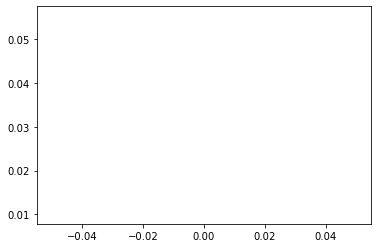

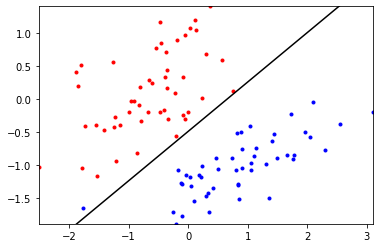

[ 2.03305458 -3.10019549  4.15043204]  =>  0.05531030825415272  /  0.010101010101010102


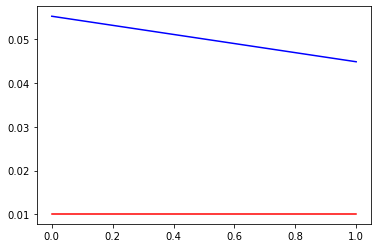

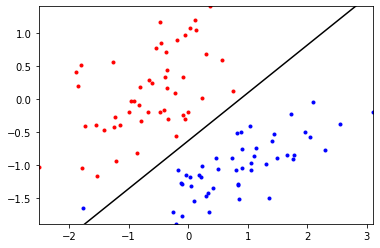

[ 2.95134355 -3.37584164  4.6638049 ]  =>  0.04490353323316865  /  0.010101010101010102


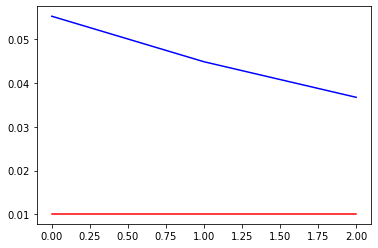

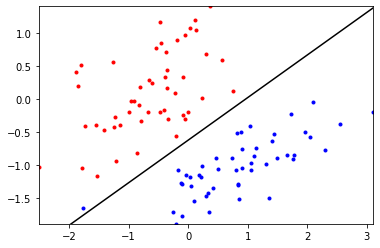

[ 3.2269532  -3.33818099  5.18441143]  =>  0.03677127638360171  /  0.010101010101010102


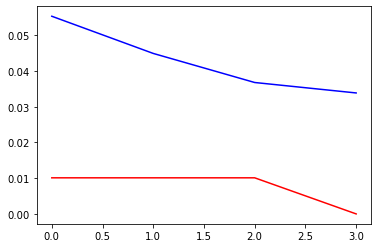

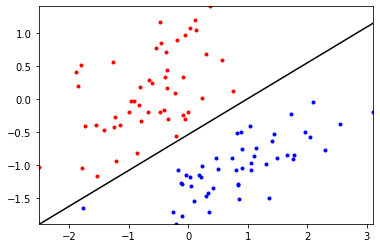

[ 3.11244407 -3.13798856  5.78632475]  =>  0.03384680389468112  /  0.0


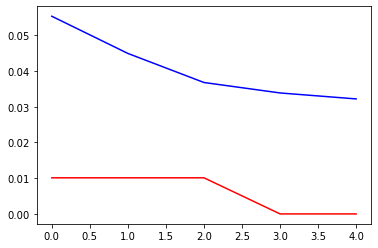

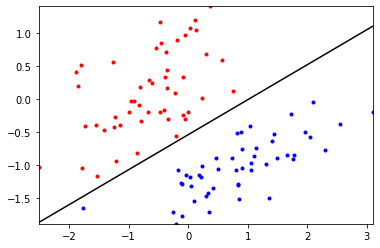

[ 3.24758788 -3.18349859  6.016508  ]  =>  0.032175864560002904  /  0.0


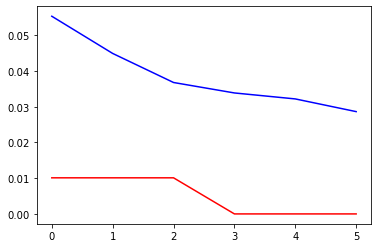

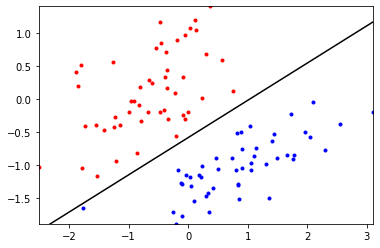

[ 3.51471473 -3.39405453  6.02442395]  =>  0.02862411962832809  /  0.0


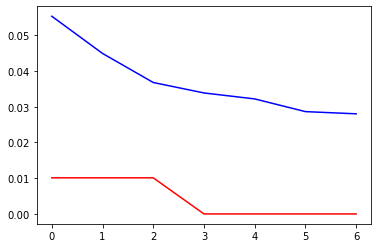

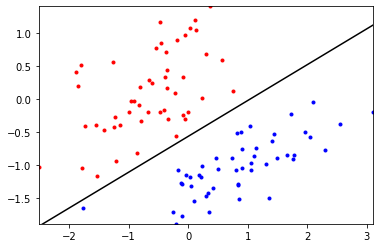

[ 3.52659362 -3.38389497  6.24210011]  =>  0.02800820699191468  /  0.0


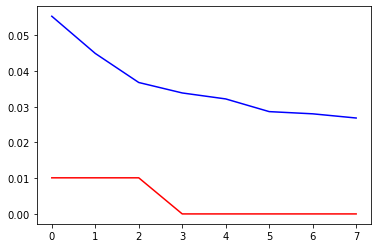

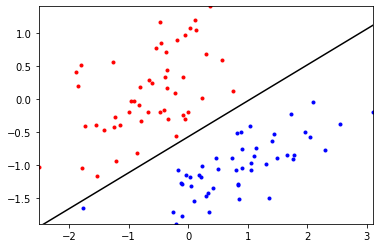

[ 3.62534861 -3.44709483  6.34056634]  =>  0.02683410948100081  /  0.0


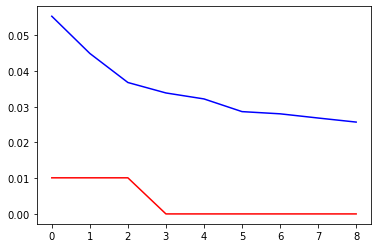

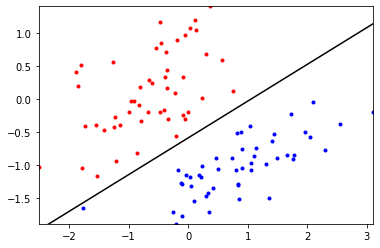

[ 3.75024967 -3.54491905  6.37709989]  =>  0.025694567131949637  /  0.0


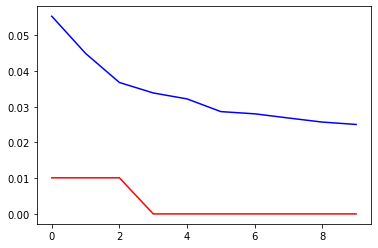

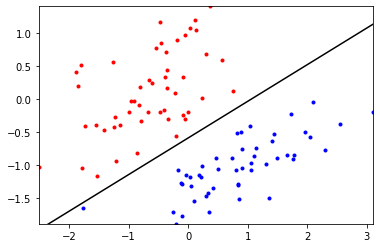

[ 3.80744447 -3.58202485  6.46480326]  =>  0.025032859596880168  /  0.0


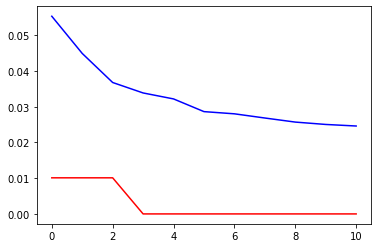

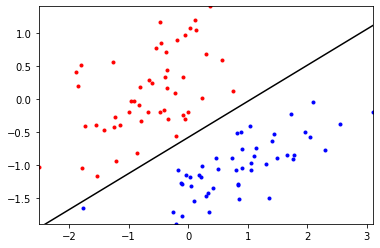

[ 3.82278701 -3.58908212  6.57625345]  =>  0.024596589285267624  /  0.0


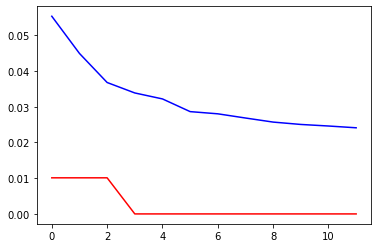

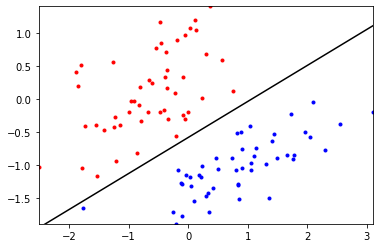

[ 3.86731096 -3.61966291  6.64610503]  =>  0.024099263851876107  /  0.0


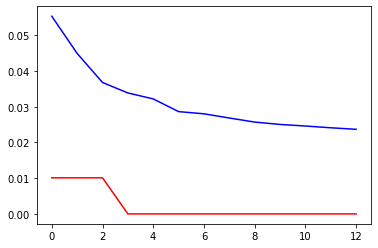

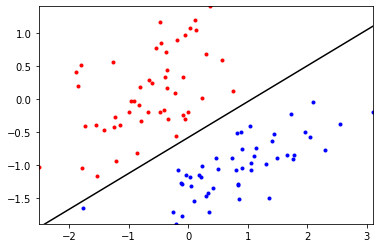

[ 3.91044883 -3.64087231  6.70910308]  =>  0.023672663726658792  /  0.0


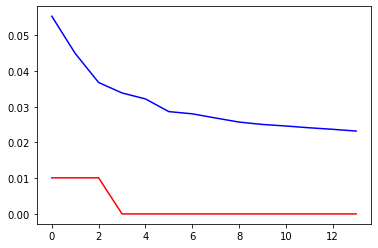

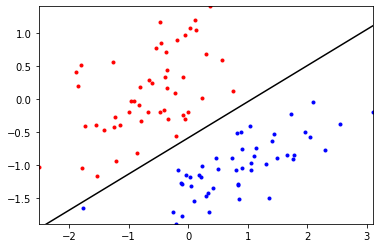

[ 3.96869872 -3.68668373  6.74347531]  =>  0.023180403367279005  /  0.0


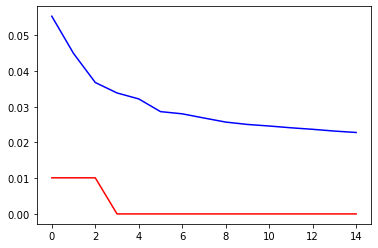

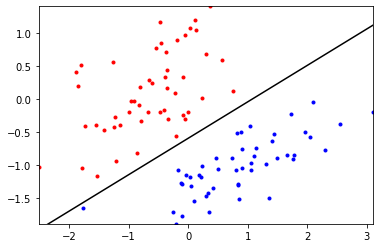

[ 4.02252962 -3.73188569  6.77272846]  =>  0.022784176251578914  /  0.0


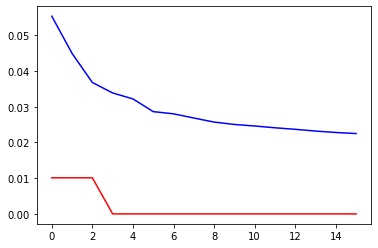

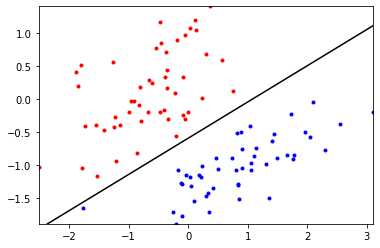

[ 4.04943167 -3.74182554  6.8283445 ]  =>  0.022481369695235766  /  0.0


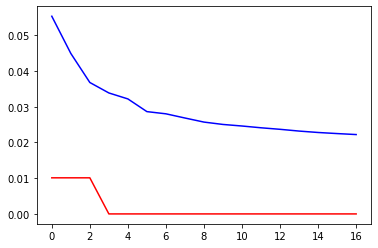

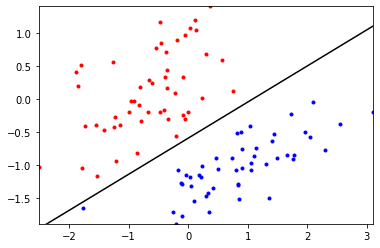

[ 4.0744254  -3.75549566  6.87820164]  =>  0.0222041569465173  /  0.0


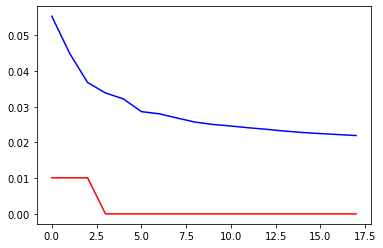

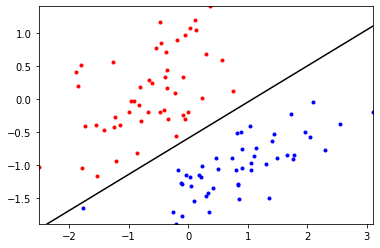

[ 4.10721052 -3.78044226  6.9130435 ]  =>  0.021927906326732752  /  0.0


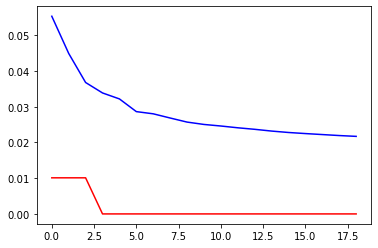

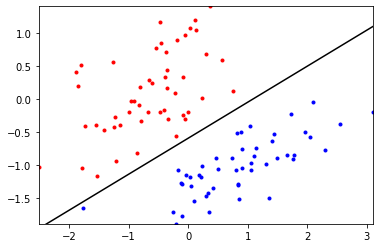

[ 4.12678017 -3.79002017  6.9588794 ]  =>  0.021698115127939854  /  0.0


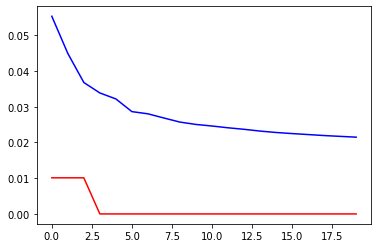

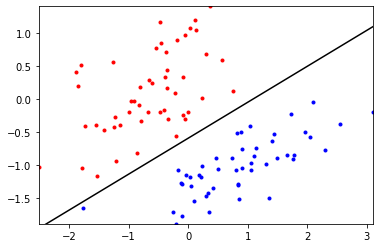

[ 4.14864791 -3.8042564   6.99727486]  =>  0.021477578505850362  /  0.0


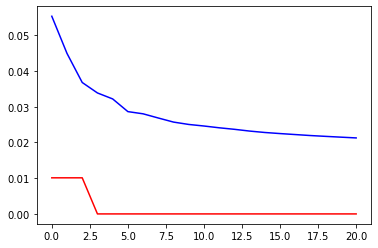

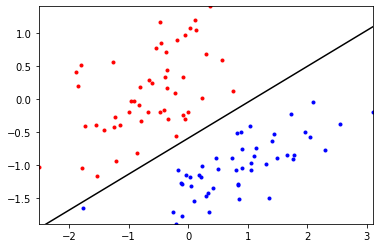

[ 4.17269204 -3.82111889  7.02988952]  =>  0.021263575181652304  /  0.0


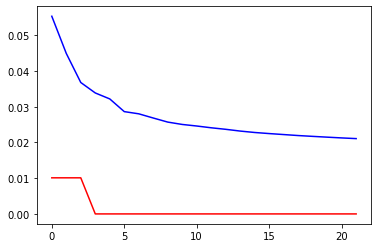

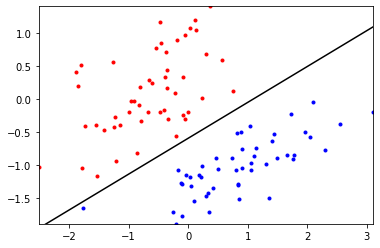

[ 4.19360633 -3.83197773  7.06406726]  =>  0.021072120809847227  /  0.0


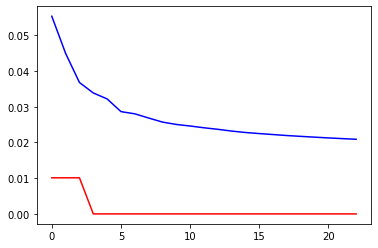

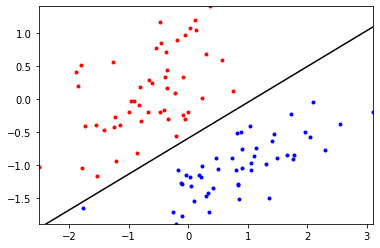

[ 4.21457561 -3.84873514  7.09282021]  =>  0.02088394272581193  /  0.0


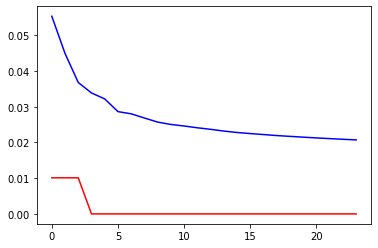

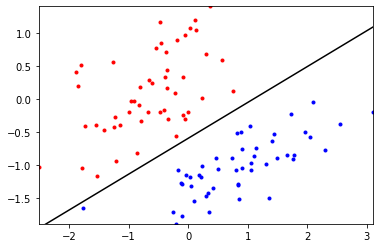

[ 4.23348567 -3.86202768  7.12181657]  =>  0.020711744669735088  /  0.0


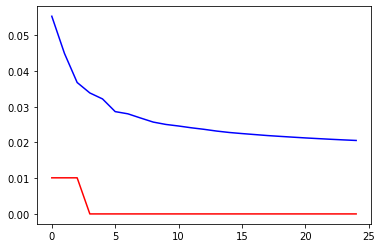

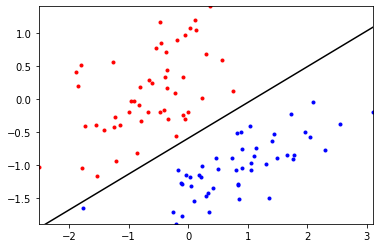

[ 4.25071357 -3.87172393  7.15130131]  =>  0.020553399496887916  /  0.0


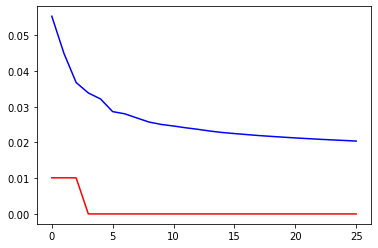

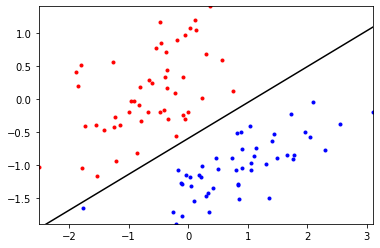

[ 4.27629365 -3.8916007   7.16874325]  =>  0.020385002669816722  /  0.0


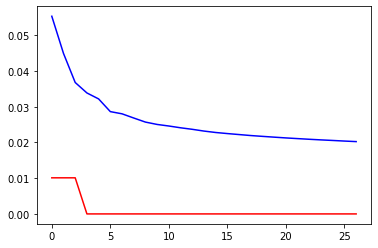

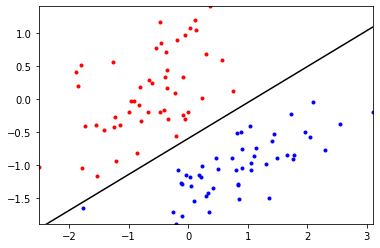

[ 4.29676581 -3.90896846  7.18870187]  =>  0.02023461930433612  /  0.0


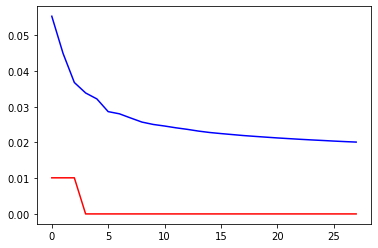

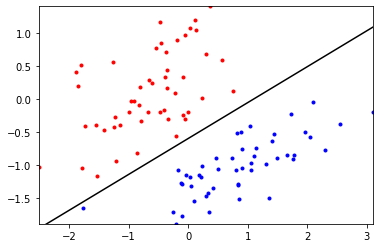

[ 4.31080001 -3.91759101  7.2148321 ]  =>  0.020099539339485033  /  0.0


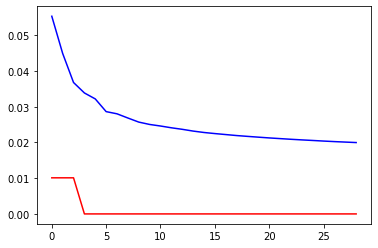

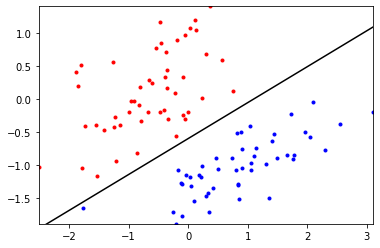

[ 4.32856943 -3.93112327  7.23479826]  =>  0.019966786227898378  /  0.0


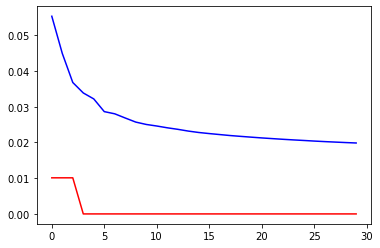

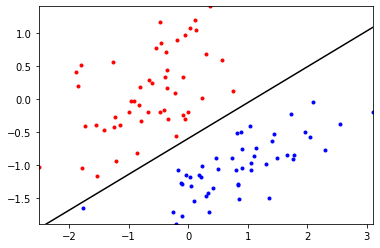

[ 4.3400082  -3.93669452  7.26082072]  =>  0.01984618697513854  /  0.0


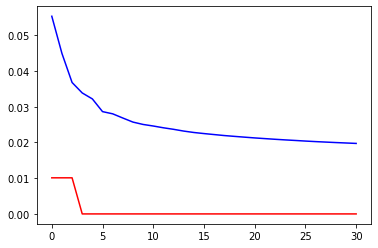

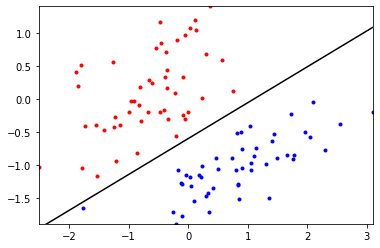

[ 4.35778435 -3.95016494  7.2779029 ]  =>  0.01972464469578076  /  0.0


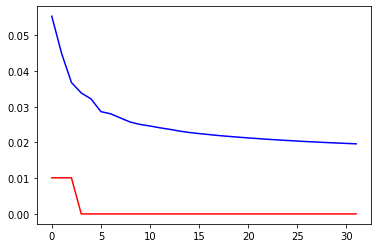

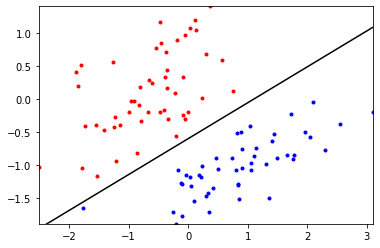

[ 4.37359656 -3.96098214  7.29610743]  =>  0.019610771740450086  /  0.0


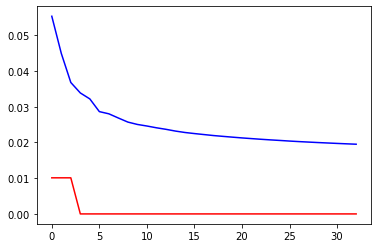

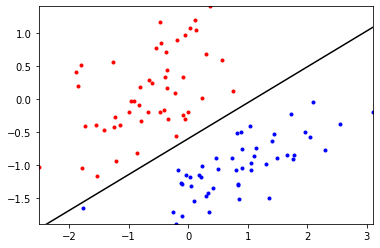

[ 4.38856185 -3.97223652  7.31347356]  =>  0.019502205033413676  /  0.0


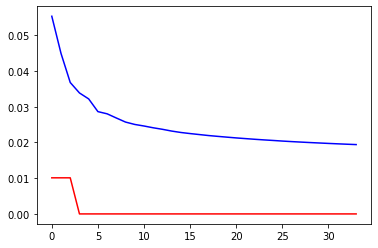

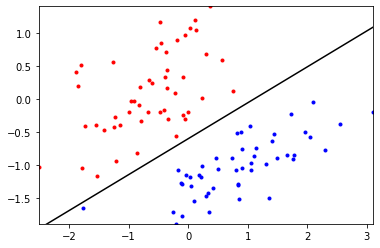

[ 4.40240382 -3.98260715  7.33083574]  =>  0.019398675865452443  /  0.0


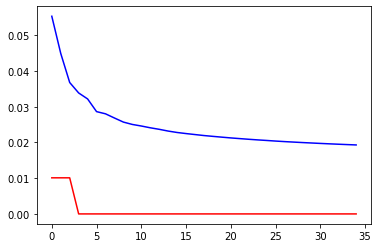

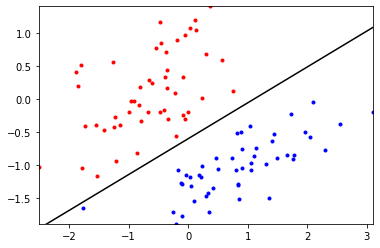

[ 4.41224954 -3.98782811  7.35192727]  =>  0.019299870401532786  /  0.0


In [10]:
learner.train(XA,YA, initStep=1)


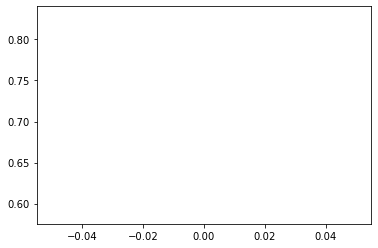

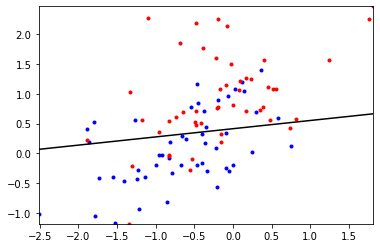

[-1.19865823 -0.3995172   2.90220104]  =>  0.5873785701736003  /  0.8282828282828283


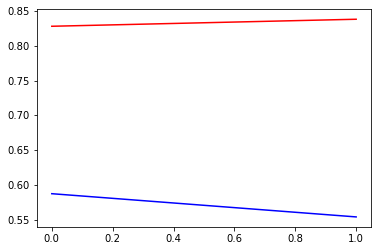

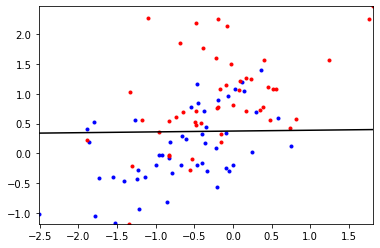

[-0.76750417 -0.02821362  2.0547202 ]  =>  0.5539656960286125  /  0.8383838383838383


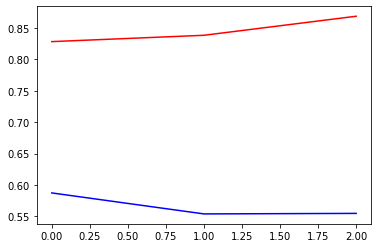

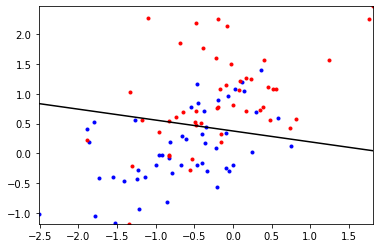

[-0.77452428  0.37764881  2.06609861]  =>  0.5547991848880607  /  0.8686868686868687


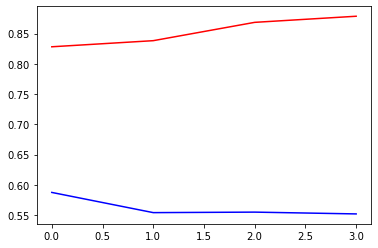

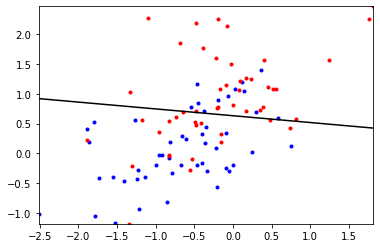

[-1.04984127  0.19010914  1.66498903]  =>  0.5518330532745562  /  0.8787878787878788


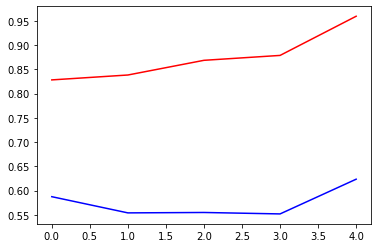

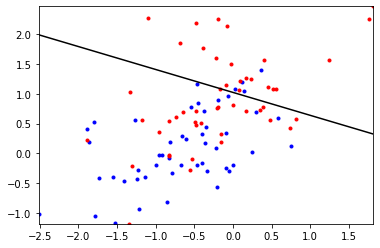

[-1.37949896  0.51937115  1.35103908]  =>  0.6234650417952918  /  0.9595959595959596


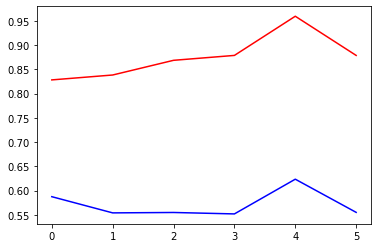

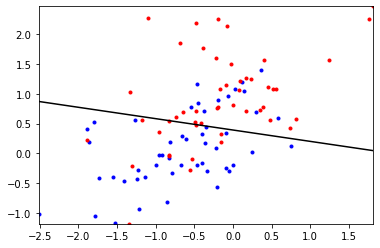

[-0.81102787  0.39512428  2.07432187]  =>  0.555031467581219  /  0.8787878787878788


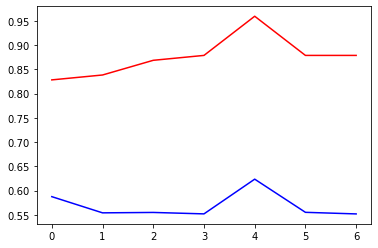

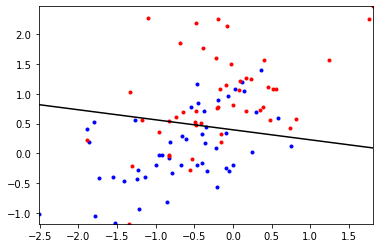

[-0.79255958  0.33717688  2.00828186]  =>  0.5517576287239656  /  0.8787878787878788


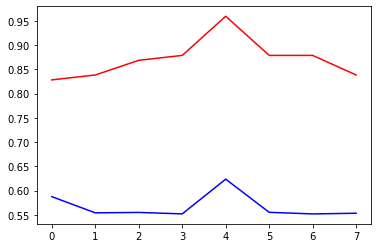

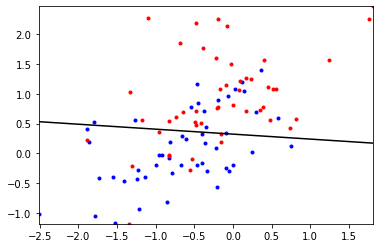

[-0.62130613  0.16041208  1.92954463]  =>  0.5531310697308581  /  0.8383838383838383


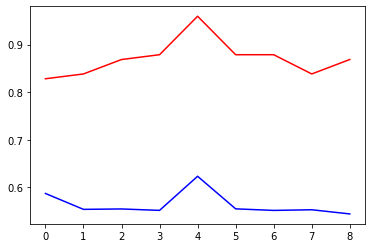

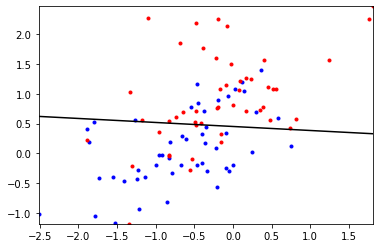

[-0.7765748   0.11593714  1.72451219]  =>  0.5443948132832289  /  0.8686868686868687


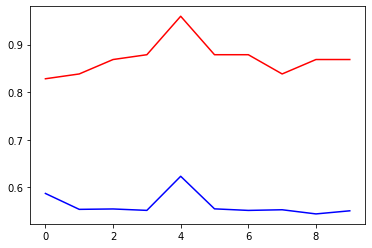

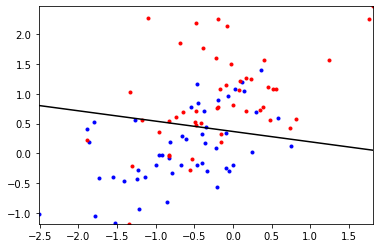

[-0.71088305  0.33620134  1.93943541]  =>  0.5509288901739542  /  0.8686868686868687


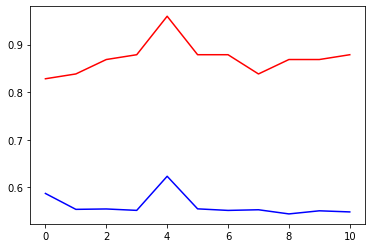

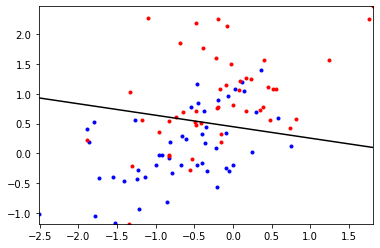

[-0.82716487  0.35595103  1.8522142 ]  =>  0.5485896485021126  /  0.8787878787878788


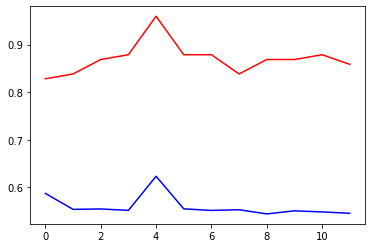

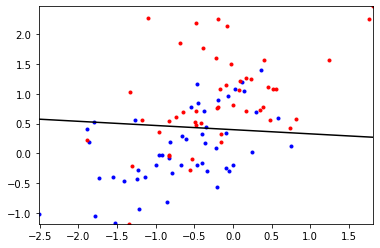

[-0.67497143  0.11918433  1.70055123]  =>  0.5457196411926476  /  0.8585858585858586


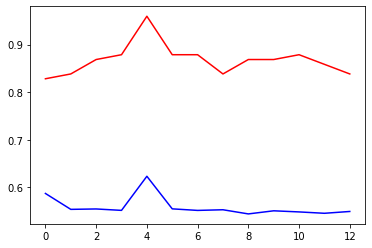

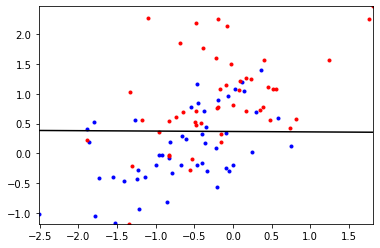

[-0.63673509  0.01195588  1.73841268]  =>  0.5495431356994178  /  0.8383838383838383


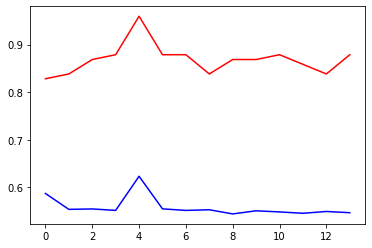

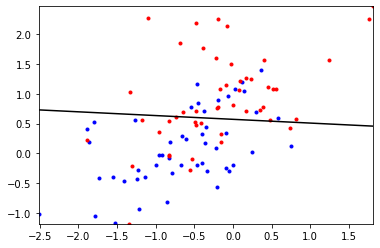

[-0.8613805   0.0950962   1.51067029]  =>  0.5469197984977501  /  0.8787878787878788


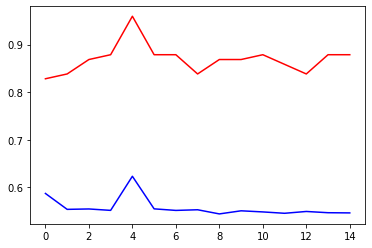

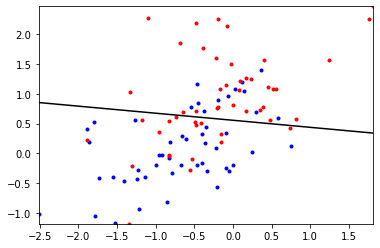

[-0.86131582  0.18392932  1.55387722]  =>  0.5465233024590958  /  0.8787878787878788


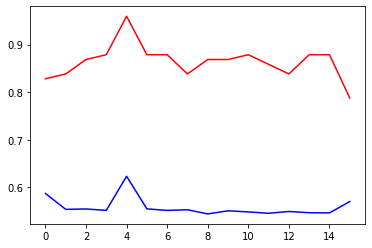

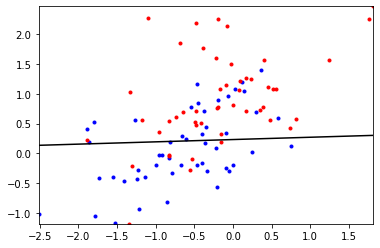

[-0.42532729 -0.07073879  1.83846178]  =>  0.5704301351446942  /  0.7878787878787878


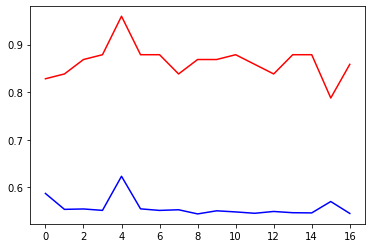

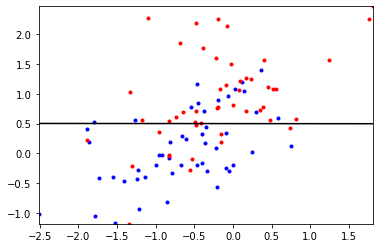

[-0.7930572   0.00172061  1.59145617]  =>  0.54541654762617  /  0.8585858585858586


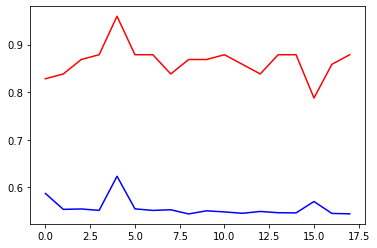

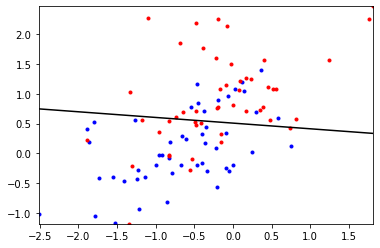

[-0.83657505  0.15696752  1.65118007]  =>  0.544564176211607  /  0.8787878787878788


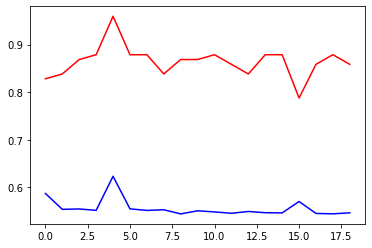

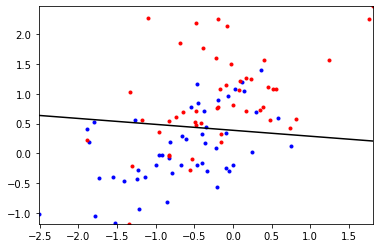

[-0.69870233  0.17970169  1.80878399]  =>  0.5466820756003463  /  0.8585858585858586


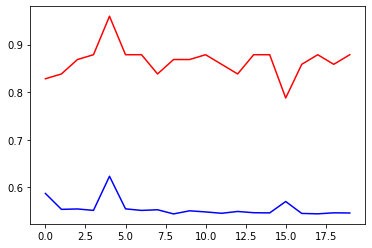

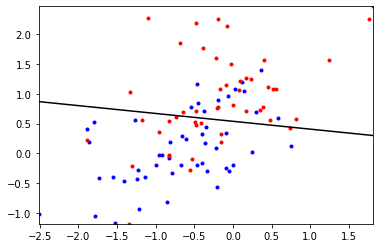

[-0.89745859  0.21962268  1.67123187]  =>  0.5463442209244522  /  0.8787878787878788


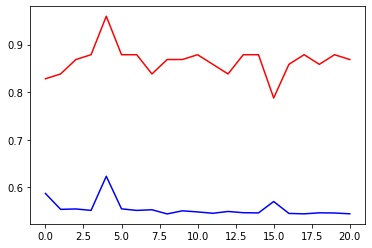

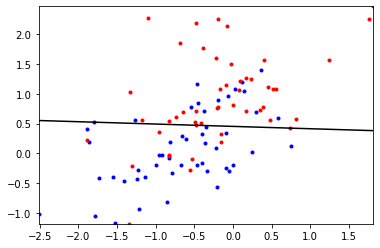

[-0.75614516  0.06564686  1.67376357]  =>  0.5446348239312939  /  0.8686868686868687


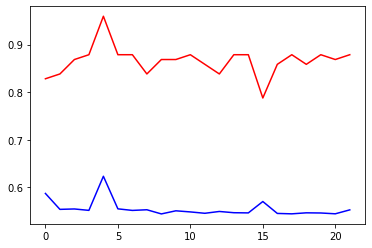

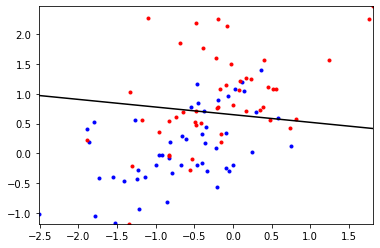

[-1.00091743  0.19778697  1.54436612]  =>  0.5529018235716225  /  0.8787878787878788


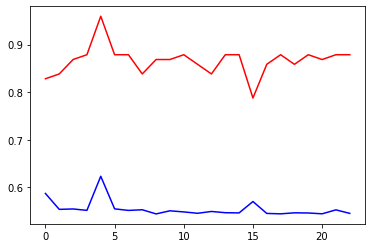

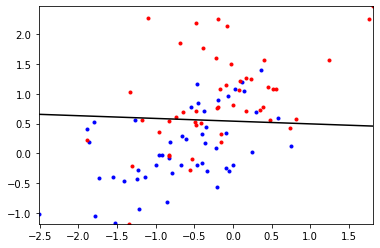

[-0.84288896  0.07133363  1.56221302]  =>  0.5455023515466595  /  0.8787878787878788


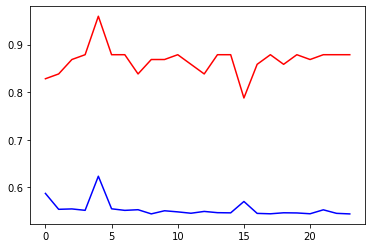

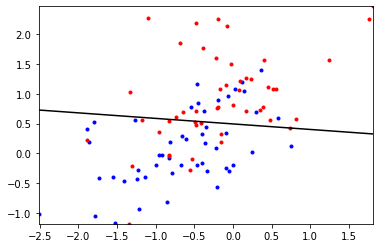

[-0.81182533  0.15268049  1.64633752]  =>  0.5443047088925425  /  0.8787878787878788


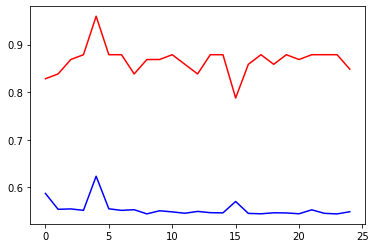

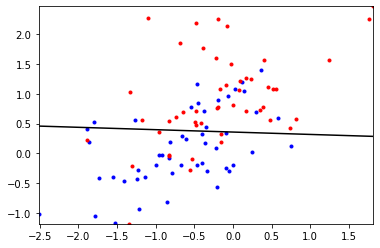

[-0.61942421  0.06920096  1.7359634 ]  =>  0.5488793714980468  /  0.8484848484848485


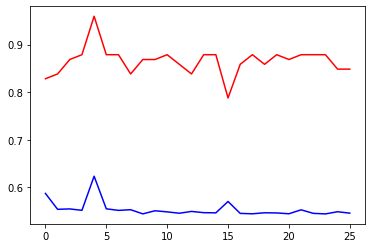

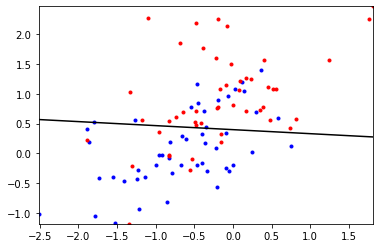

[-0.6892387   0.11710038  1.73546665]  =>  0.5458975921585509  /  0.8484848484848485


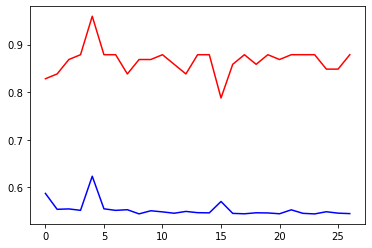

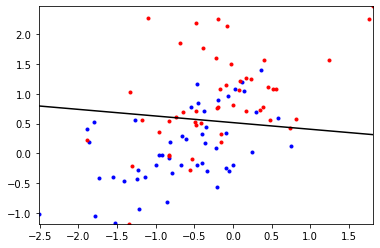

[-0.84157131  0.18167427  1.63451113]  =>  0.5449488875784314  /  0.8787878787878788


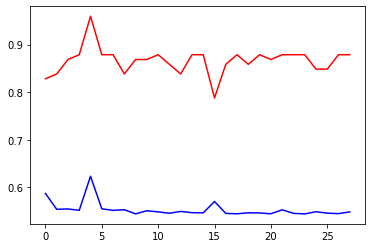

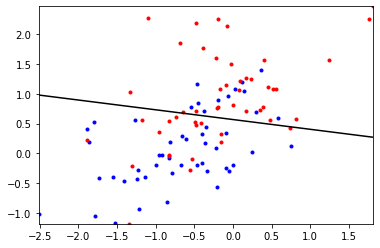

[-0.91522145  0.2643089   1.61571444]  =>  0.5485684532683324  /  0.8787878787878788


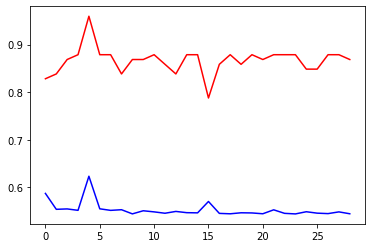

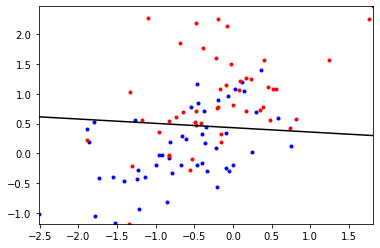

[-0.72181943  0.12202256  1.67909349]  =>  0.5446098727275115  /  0.8686868686868687


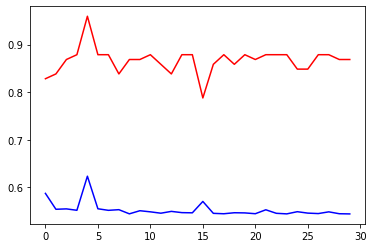

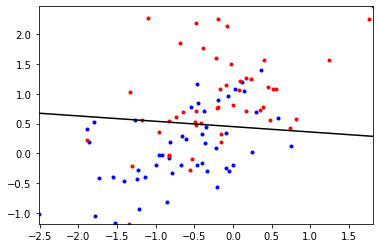

[-0.75031631  0.15030392  1.67567534]  =>  0.5442209453253145  /  0.8686868686868687


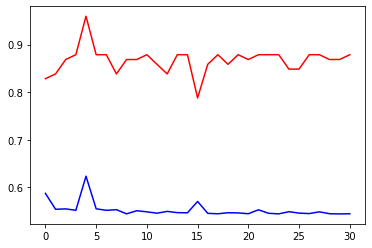

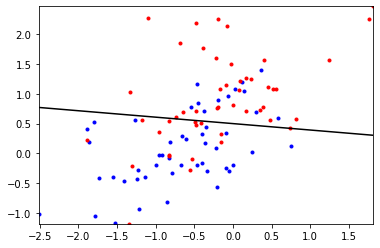

[-0.81638106  0.17653139  1.63742927]  =>  0.5445250785608896  /  0.8787878787878788


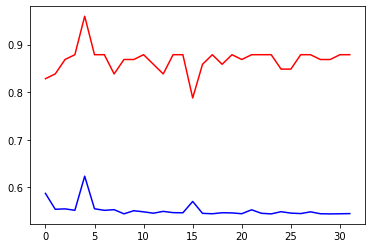

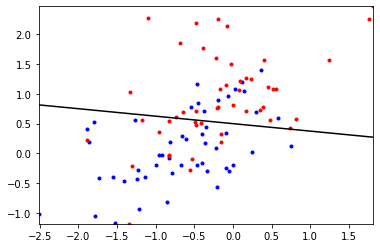

[-0.83159954  0.20924578  1.67071413]  =>  0.5448740835903523  /  0.8787878787878788


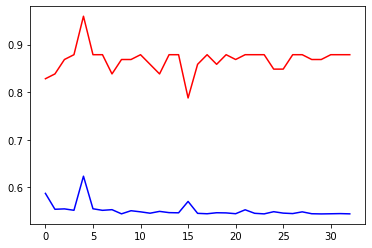

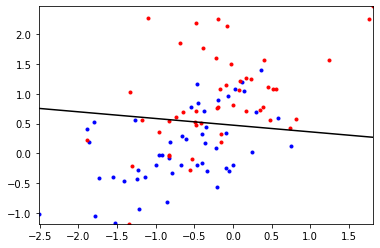

[-0.79771582  0.18918993  1.68930267]  =>  0.5443578933453063  /  0.8787878787878788


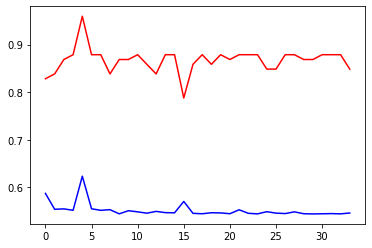

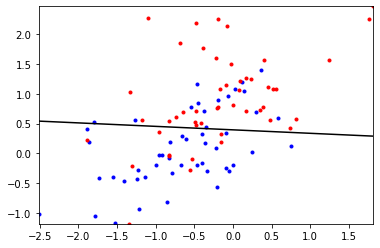

[-0.68018189  0.10042249  1.72600673]  =>  0.5461593875773109  /  0.8484848484848485


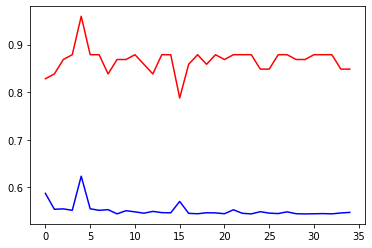

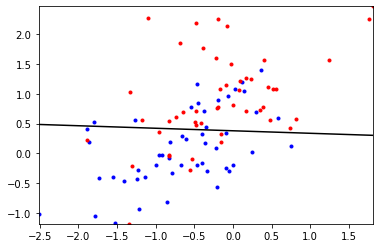

[-0.65715439  0.07330592  1.73684439]  =>  0.5474224154614615  /  0.8484848484848485


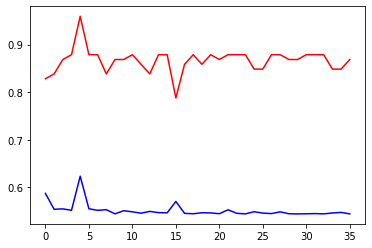

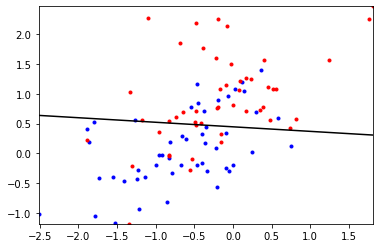

[-0.74974669  0.12854808  1.68614373]  =>  0.5443229904541714  /  0.8686868686868687


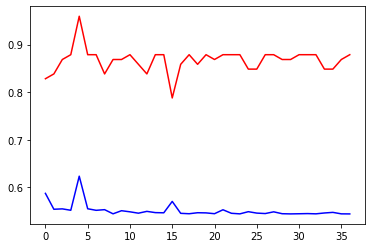

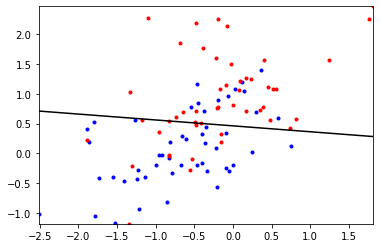

[-0.77545024  0.16627352  1.68311013]  =>  0.5441863935371392  /  0.8787878787878788


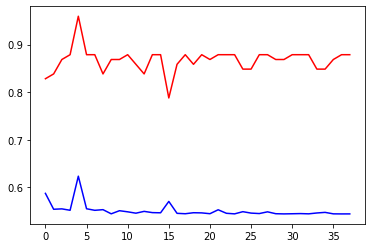

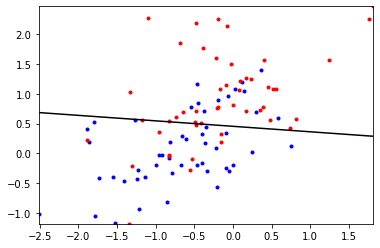

[-0.76819963  0.15562406  1.69546344]  =>  0.5442292569433625  /  0.8787878787878788


In [11]:
learner2.train(XB,YB,initStep=1)


## Q8. L1 regularization

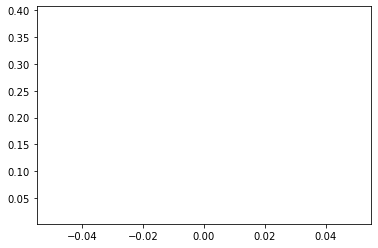

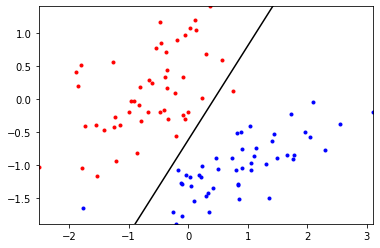

[ 0.90387195 -2.07137248  1.45482797]  =>  0.3888475499818528  /  0.020202020202020204


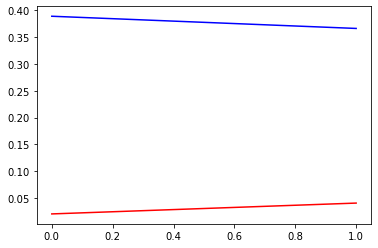

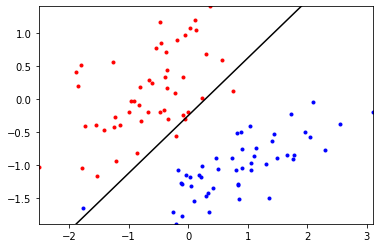

[ 0.48019363 -1.66062785  1.90696016]  =>  0.36610190414045324  /  0.04040404040404041


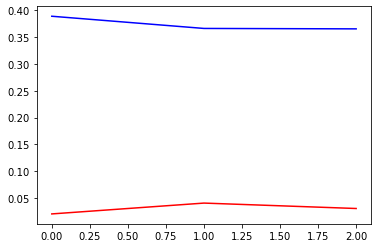

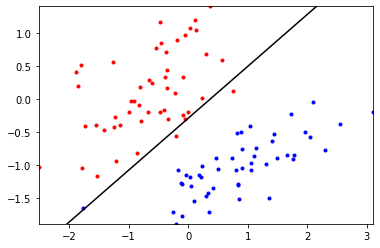

[ 0.54018895 -1.45506095  1.85325038]  =>  0.36530769695173604  /  0.030303030303030304


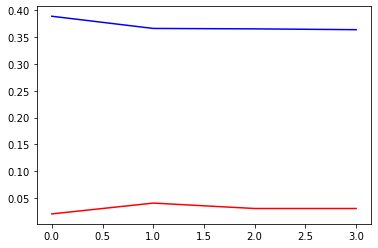

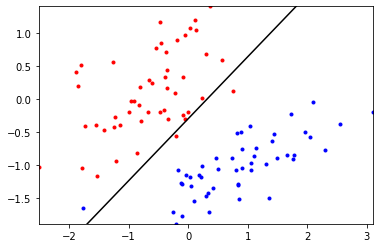

[ 0.51888676 -1.62900883  1.73775352]  =>  0.3637892791359958  /  0.030303030303030304


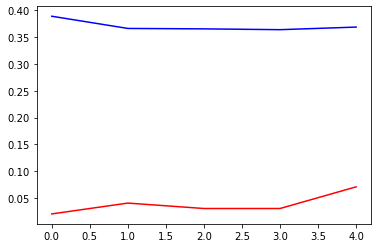

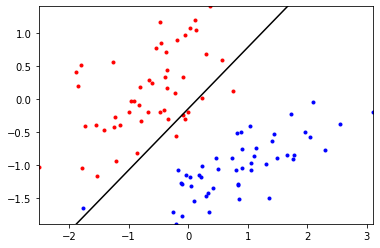

[ 0.27063287 -1.70072192  1.83293678]  =>  0.3686345605858268  /  0.0707070707070707


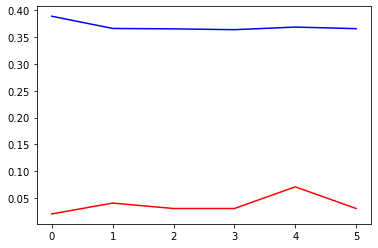

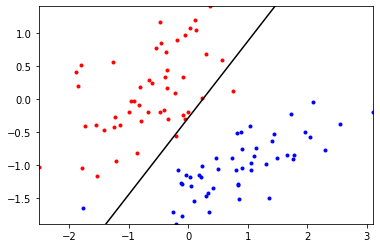

[ 0.4491524  -1.80889026  1.56007141]  =>  0.3657417416555247  /  0.030303030303030304


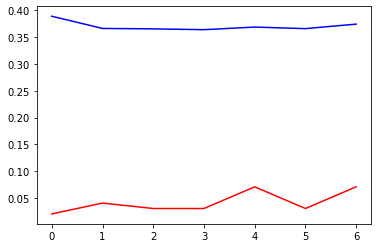

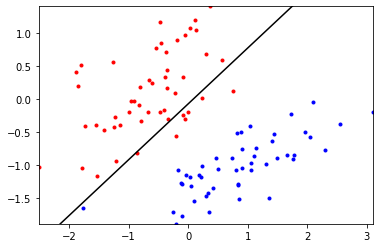

[ 0.13315801 -1.53679171  1.81971119]  =>  0.3741456617936123  /  0.0707070707070707


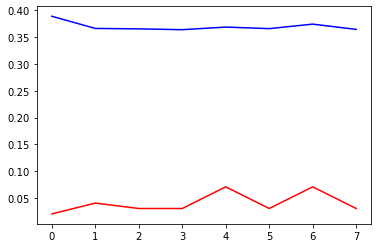

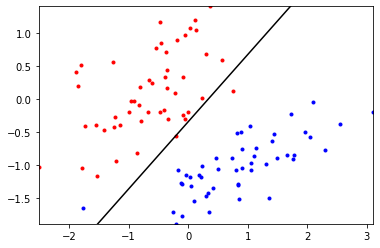

[ 0.56667835 -1.67181016  1.64528992]  =>  0.36431714450640684  /  0.030303030303030304


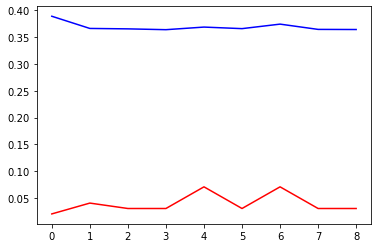

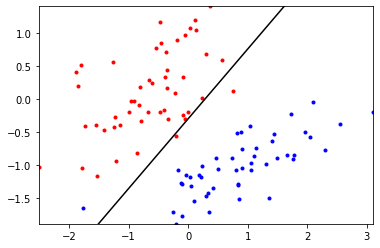

[ 0.48152858 -1.69873188  1.61058849]  =>  0.3641003736023498  /  0.030303030303030304


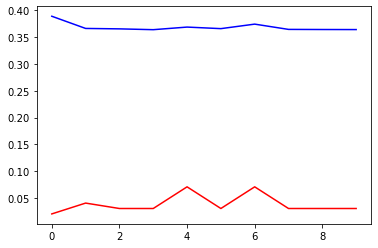

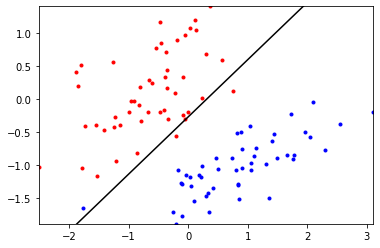

[ 0.46468501 -1.48529634  1.71654242]  =>  0.36398601438490175  /  0.030303030303030304


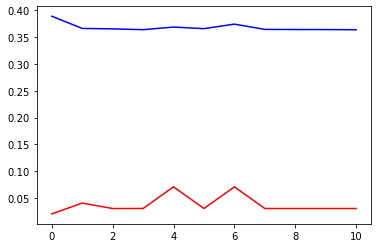

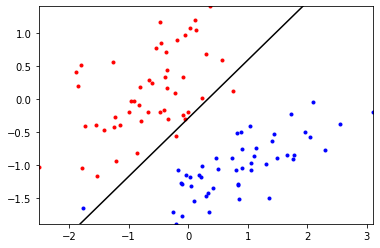

[ 0.49415036 -1.48795912  1.69115255]  =>  0.36367993273585375  /  0.030303030303030304


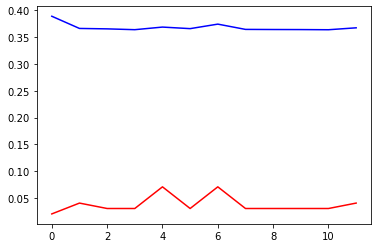

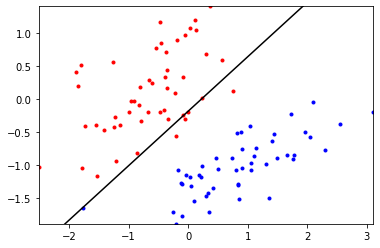

[ 0.33035599 -1.47637394  1.79274247]  =>  0.3672671011253532  /  0.04040404040404041


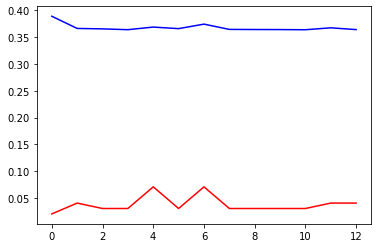

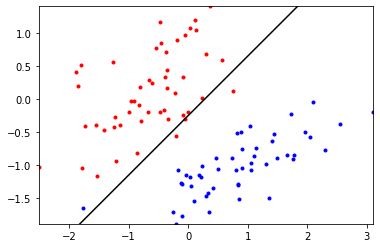

[ 0.43131508 -1.54262325  1.71480034]  =>  0.3639340620349386  /  0.04040404040404041


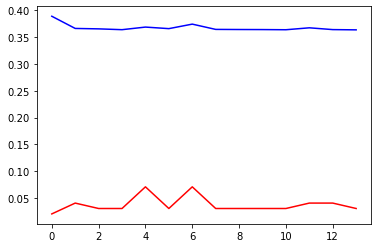

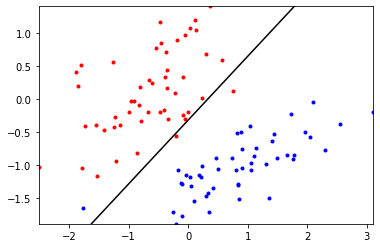

[ 0.52283844 -1.58124372  1.63847533]  =>  0.3634692188776263  /  0.030303030303030304


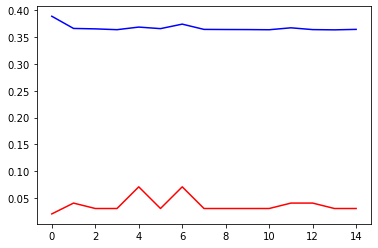

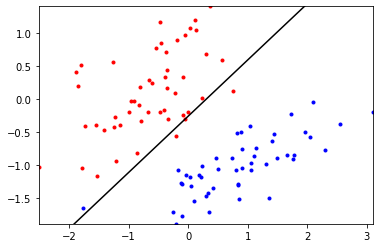

[ 0.44790519 -1.46511133  1.72209512]  =>  0.3643402009691929  /  0.030303030303030304


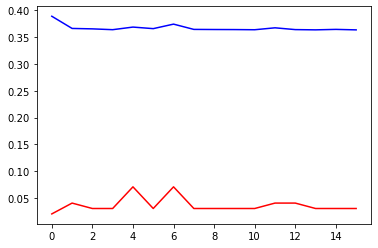

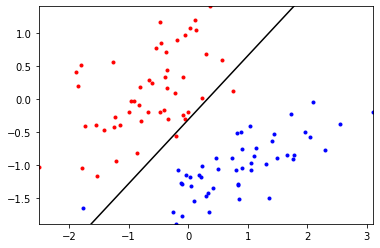

[ 0.51270645 -1.57903072  1.6330788 ]  =>  0.3634296157389152  /  0.030303030303030304


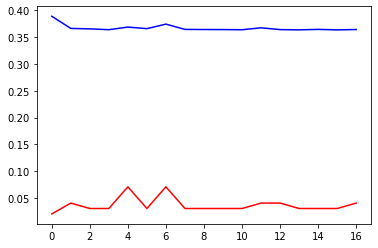

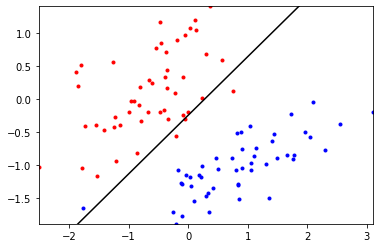

[ 0.41940704 -1.5097008   1.70285407]  =>  0.3641089929027521  /  0.04040404040404041


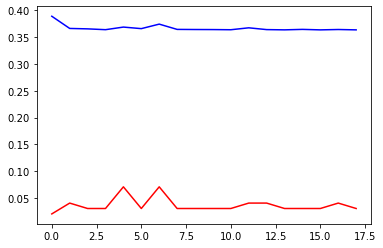

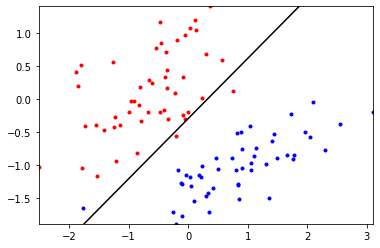

[ 0.49570092 -1.52429171  1.6741984 ]  =>  0.3634473519941944  /  0.030303030303030304


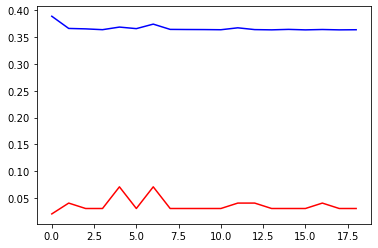

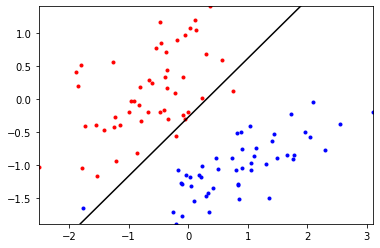

[ 0.46946174 -1.51204763  1.70018601]  =>  0.3636819414146406  /  0.030303030303030304


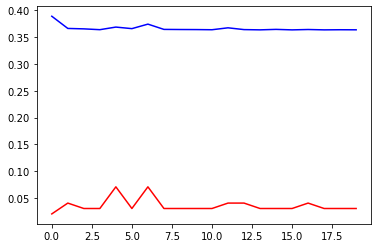

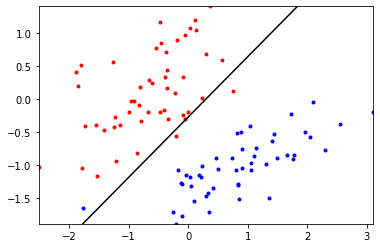

[ 0.46084136 -1.54037752  1.68815499]  =>  0.36355184384115635  /  0.030303030303030304


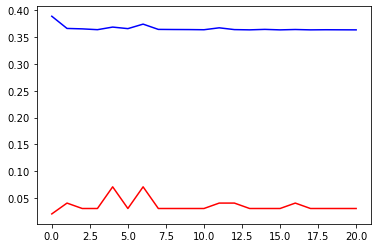

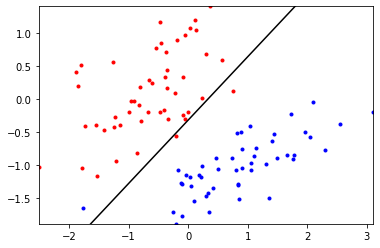

[ 0.52372572 -1.57256096  1.64129748]  =>  0.3634526159337402  /  0.030303030303030304


In [12]:
learner.train(XA,YA,regul=1,alpha=0.05)

In first trainer, I can see that the value of parameter significantly dropped(from\[7.3 -5.7 11.5\] to \[0.4 -1.5  1.7\])
For alpha, I tried 1,0.05 and 0.000005. alpha=1 can't even converge, and when alpha=0.000005, the parameter's value is \[ 4.41535999 -3.98830163  7.36098412\], which didn't significantly regularize the parameter.

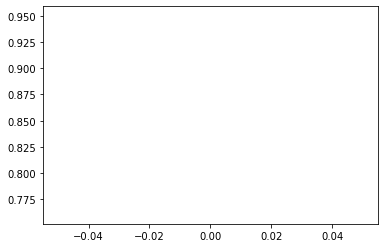

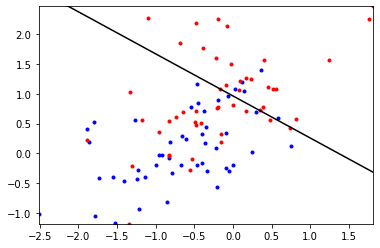

[-1.03416185  0.75822697  1.07507112]  =>  0.761218735278886  /  0.9494949494949495


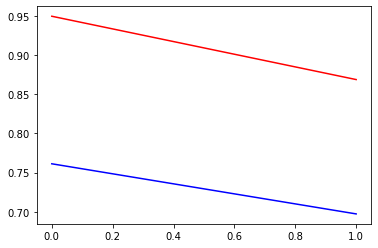

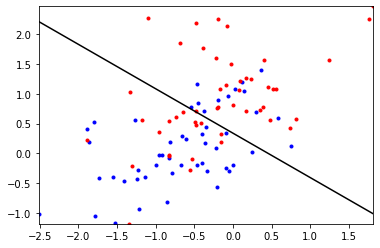

[-0.42349236  0.93354758  1.2536641 ]  =>  0.6972397211799259  /  0.8686868686868687


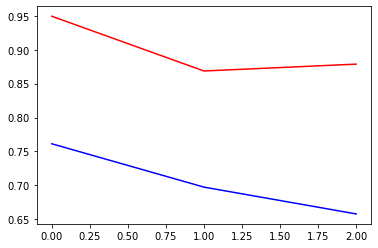

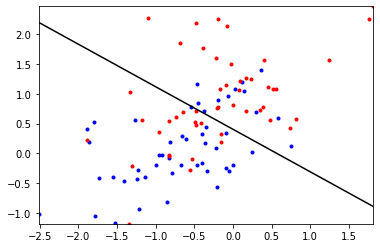

[-0.34911416  0.61739038  0.86587274]  =>  0.6576730629502827  /  0.8787878787878788


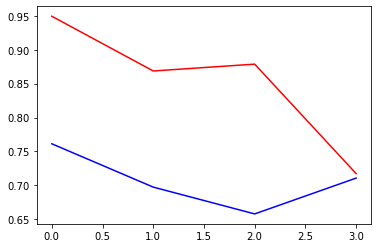

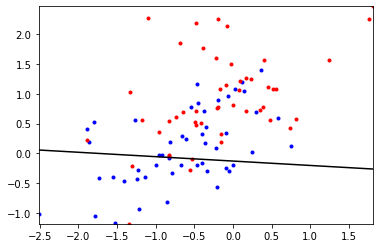

[0.19103833 0.10897807 1.47854052]  =>  0.7105755241249231  /  0.7171717171717171


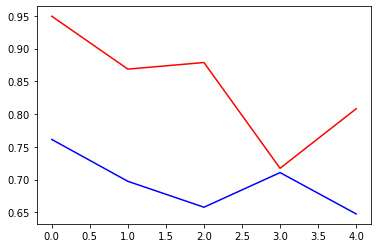

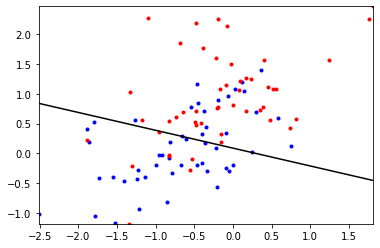

[-0.10654424  0.36451346  1.21968128]  =>  0.6474329305821382  /  0.8080808080808081


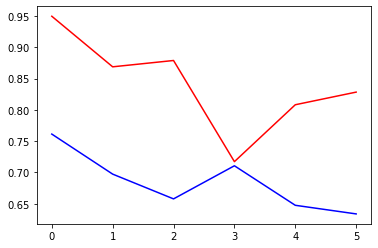

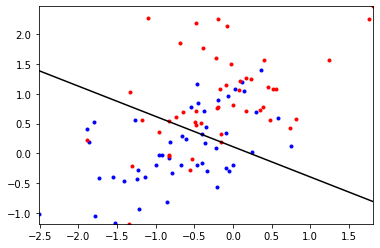

[-0.08038907  0.36542285  0.72005737]  =>  0.6336517994908689  /  0.8282828282828283


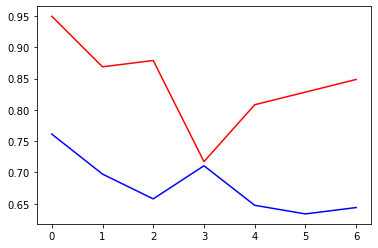

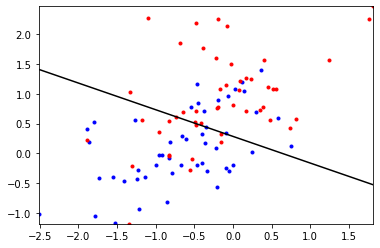

[-0.28595467  0.44989852  1.00622238]  =>  0.6438380695192216  /  0.8484848484848485


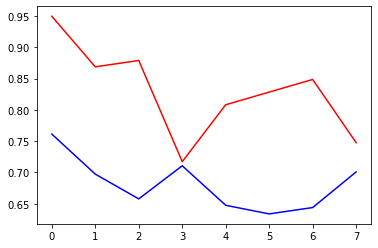

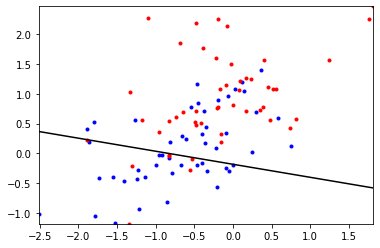

[0.24151362 0.28849905 1.31917005]  =>  0.7007926203299925  /  0.7474747474747475


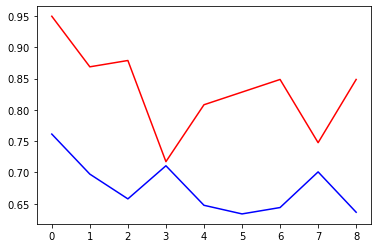

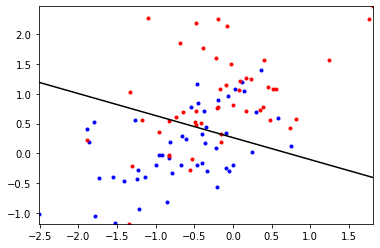

[-0.2363748   0.33074351  0.89609099]  =>  0.6363370302816896  /  0.8484848484848485


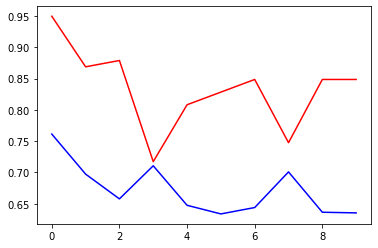

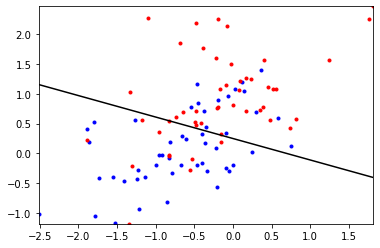

[-0.21716581  0.31456841  0.8738849 ]  =>  0.6352898233393978  /  0.8484848484848485


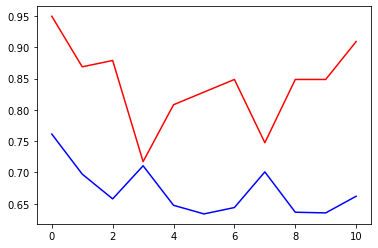

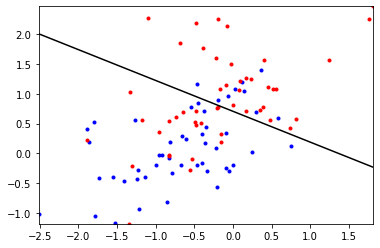

[-0.51326705  0.3766248   0.72856045]  =>  0.6618977964598501  /  0.9090909090909091


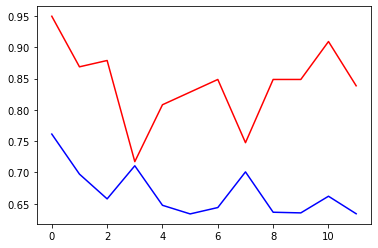

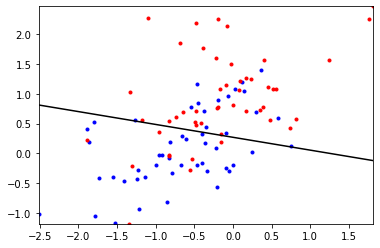

[-0.24189465  0.19365825  0.89891075]  =>  0.6339191252075937  /  0.8383838383838383


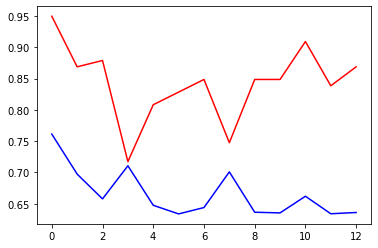

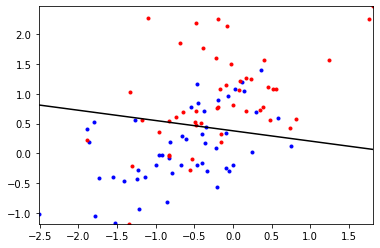

[-0.32617104  0.14867186  0.86300232]  =>  0.6359305664014915  /  0.8686868686868687


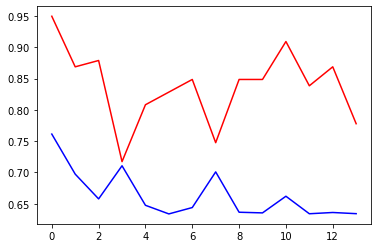

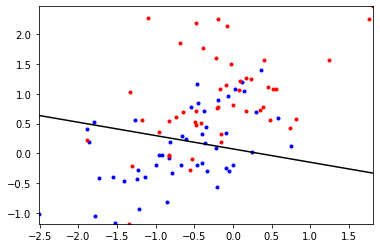

[-0.06662969  0.20109903  0.89935681]  =>  0.6340506376748051  /  0.7777777777777778


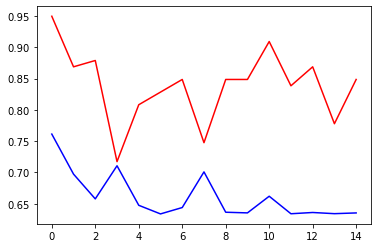

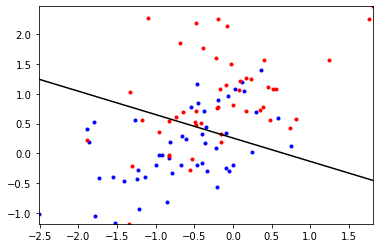

[-0.20865555  0.31848769  0.81166357]  =>  0.6352247194581113  /  0.8484848484848485


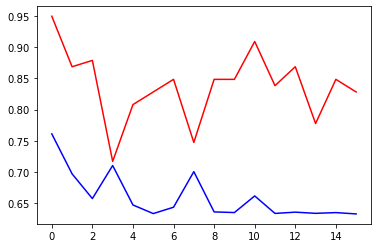

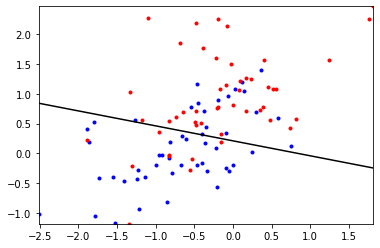

[-0.15896155  0.19019763  0.75803452]  =>  0.6331182278884323  /  0.8282828282828283


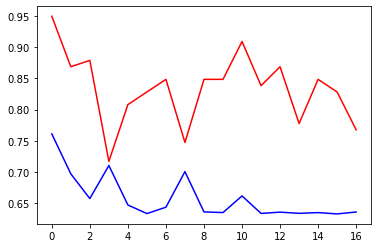

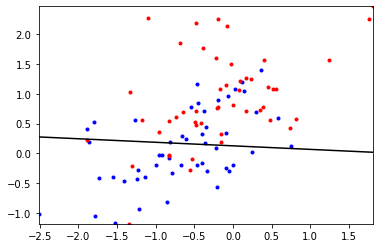

[-0.08971745  0.04234639  0.71264423]  =>  0.6361850534762191  /  0.7676767676767676


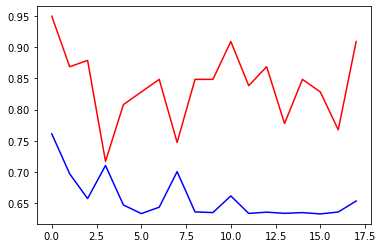

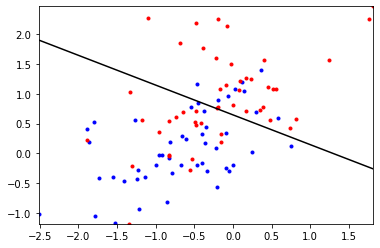

[-0.41720519  0.3230162   0.64708663]  =>  0.6537728609388034  /  0.9090909090909091


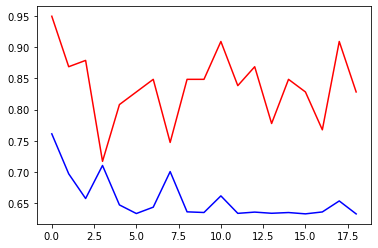

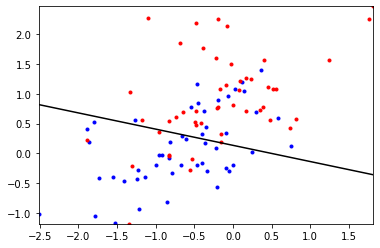

[-0.11735306  0.23748213  0.87371237]  =>  0.6330222372351249  /  0.8282828282828283


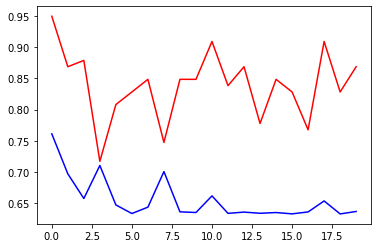

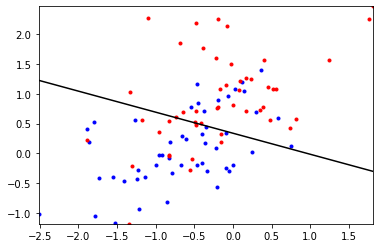

[-0.27628985  0.28903806  0.8192747 ]  =>  0.6369400780017201  /  0.8686868686868687


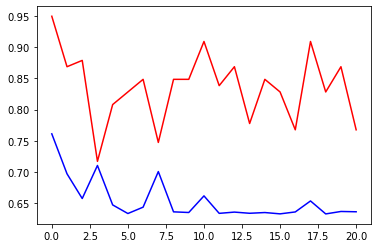

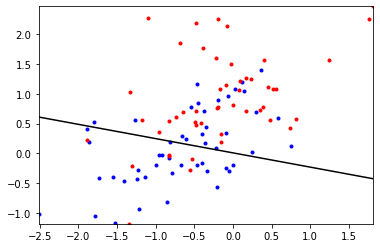

[-0.00756105  0.22475956  0.93991113]  =>  0.6364573409164485  /  0.7676767676767676


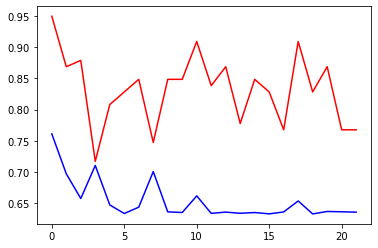

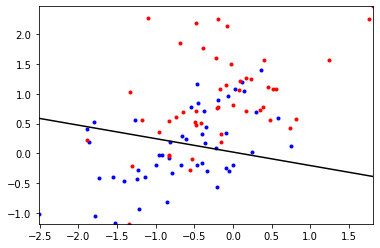

[-0.01950557  0.2091851   0.92727536]  =>  0.6358438324876095  /  0.7676767676767676


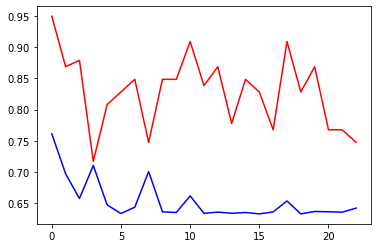

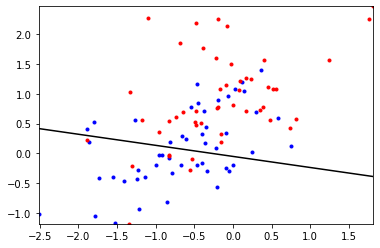

[0.04537309 0.16385739 0.88181073]  =>  0.6423808168172155  /  0.7474747474747475


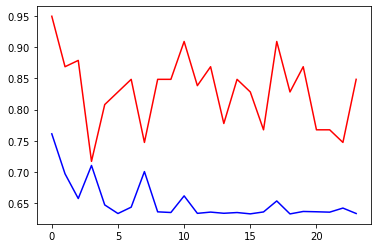

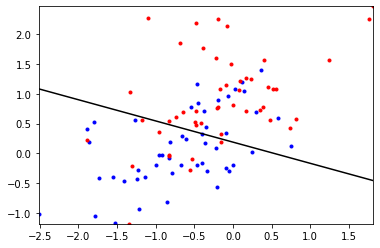

[-0.15900824  0.30054272  0.84560697]  =>  0.6336840223213105  /  0.8484848484848485


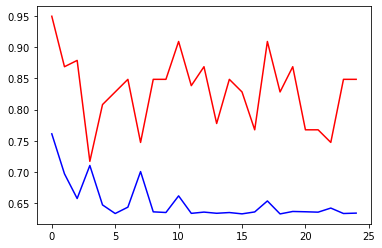

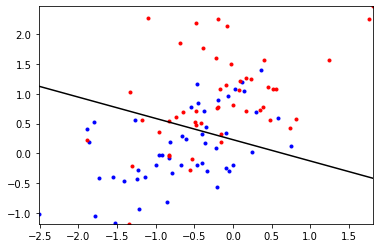

[-0.19222731  0.29982342  0.84008647]  =>  0.6342982146001038  /  0.8484848484848485


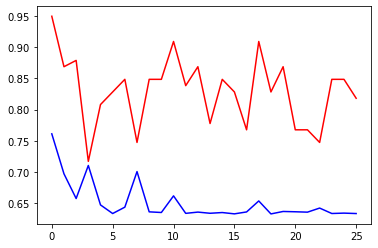

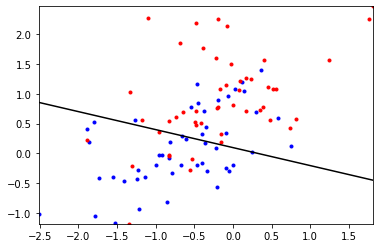

[-0.08604695  0.26952452  0.89357711]  =>  0.6336216314641157  /  0.8181818181818182


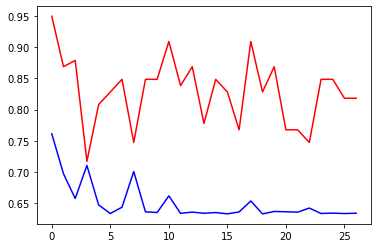

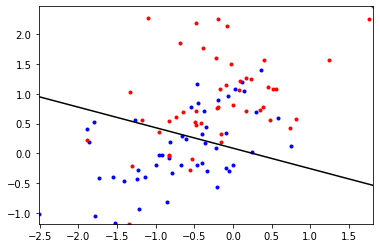

[-0.0780047   0.30971981  0.90105737]  =>  0.6341414613989411  /  0.8181818181818182


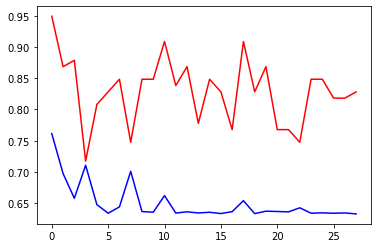

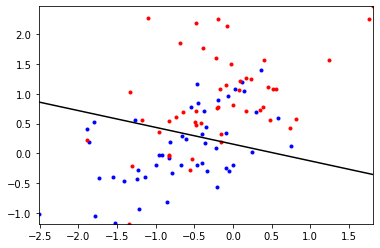

[-0.1235531   0.22483128  0.80006293]  =>  0.6325555855790179  /  0.8282828282828283


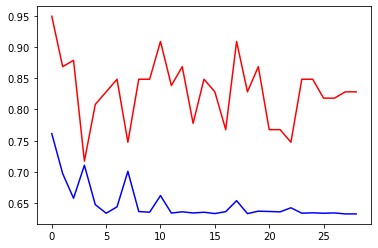

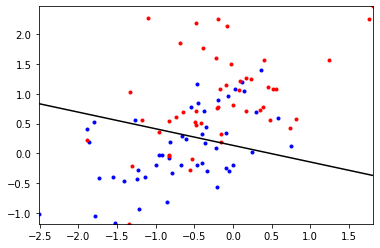

[-0.10875249  0.22676621  0.81429689]  =>  0.6325436245968157  /  0.8282828282828283


In [13]:
learner2.train(XB,YB,regul=1,alpha=0.05)

In second trainer, I tried  alpha=0.5, 0.05 and 0.00005. alpha=0.5 cannot even converge, while in alpha=0.00005, the parameter's value is \[ -0.68822824  0.10276988  1.67702896\], which also didn't really help. alpha=0.05 shows the best result, it gives us \[-0.09707454  0.18329869  0.79438016\], and the error rate is also good.

## Q9. L2 regularization

Similar result to L1 regularization. The model cannot converge while alpha is too high (ex. alpha=2), but if the alpha is too low, the power of regularizaion is lower, then the parameter becomes higher. 

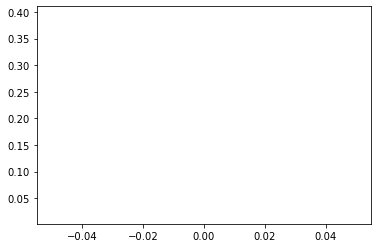

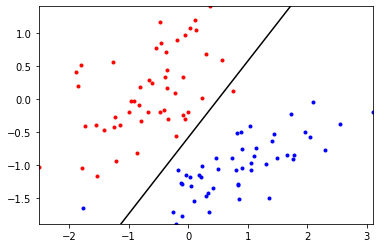

[ 0.60733257 -1.20162233  1.03977946]  =>  0.39217440099480283  /  0.020202020202020204


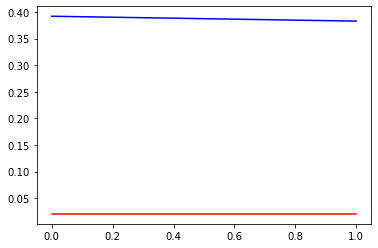

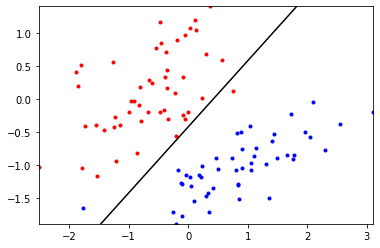

[ 0.45619429 -1.08095936  1.08139186]  =>  0.3830125754301771  /  0.020202020202020204


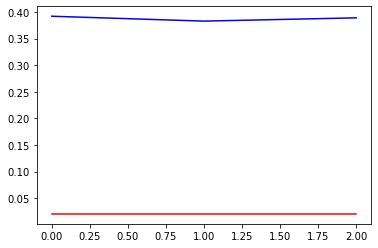

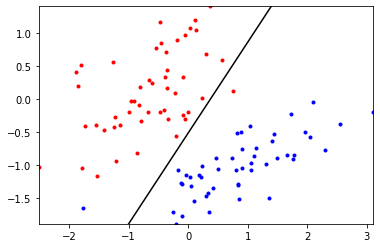

[ 0.45030916 -1.20009075  0.87376561]  =>  0.3891586551210385  /  0.020202020202020204


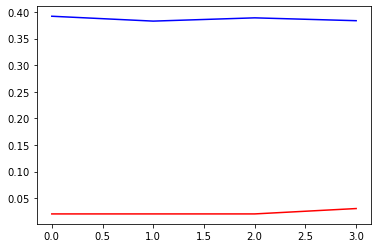

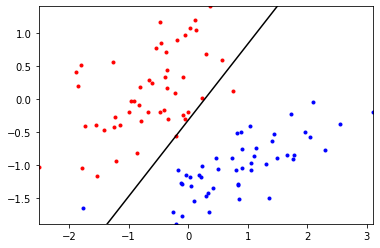

[ 0.32776708 -1.1729916   1.01805915]  =>  0.3837919313443026  /  0.030303030303030304


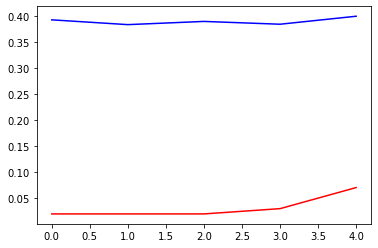

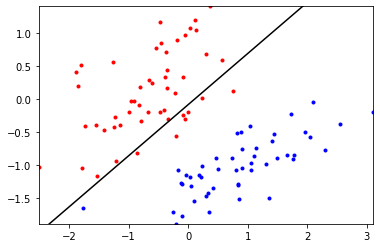

[ 0.10234995 -0.93230556  1.20596969]  =>  0.3990879127299396  /  0.0707070707070707


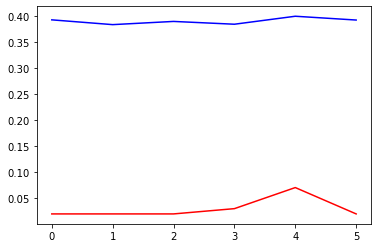

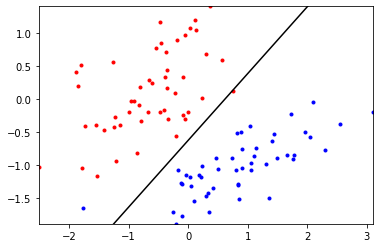

[ 0.63541388 -1.02561771  1.01557014]  =>  0.39180778181295  /  0.020202020202020204


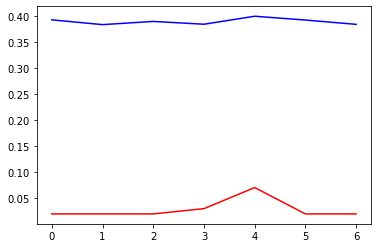

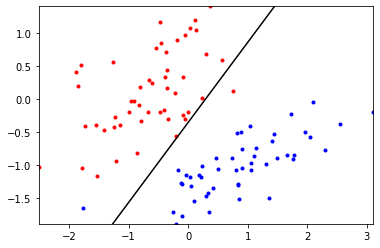

[ 0.33131029 -1.13209517  0.93520601]  =>  0.38353527470934956  /  0.020202020202020204


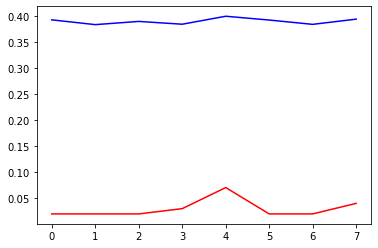

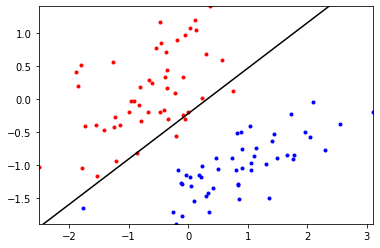

[ 0.26475918 -0.82219602  1.1975033 ]  =>  0.39351275600395486  /  0.04040404040404041


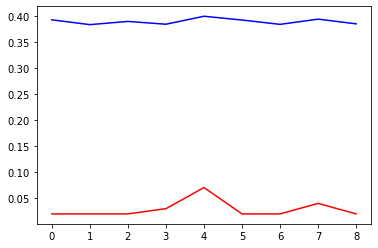

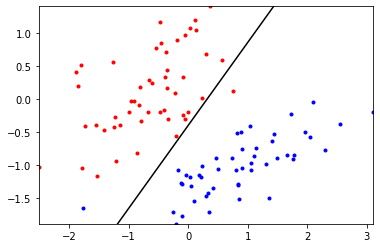

[ 0.36837084 -1.15460616  0.92007154]  =>  0.38451107703861087  /  0.020202020202020204


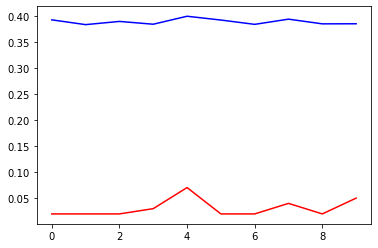

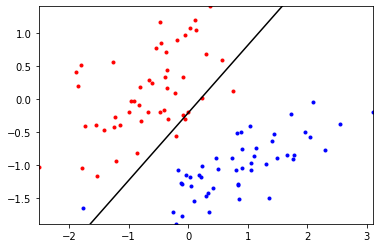

[ 0.21800544 -1.05954208  1.0373839 ]  =>  0.38465177258866  /  0.050505050505050504


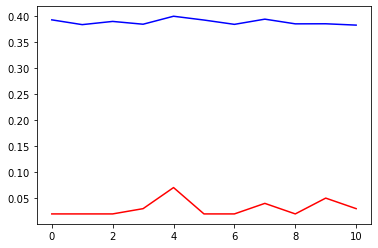

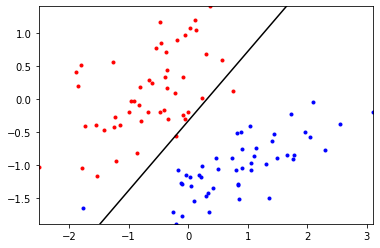

[ 0.3452368  -1.08968621  1.03668351]  =>  0.3820742661123429  /  0.030303030303030304


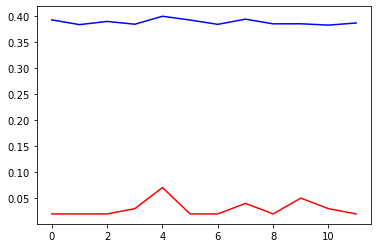

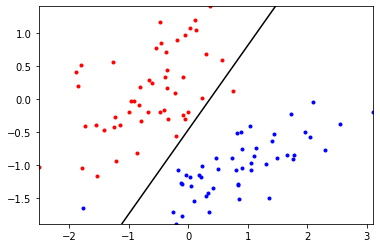

[ 0.43175529 -1.17720678  0.92301425]  =>  0.38617089466805304  /  0.020202020202020204


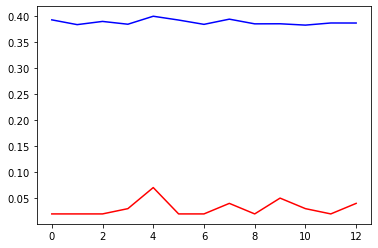

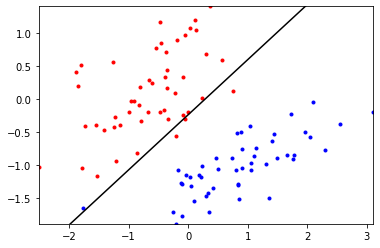

[ 0.267012   -0.93445648  1.12130165]  =>  0.38609186222122327  /  0.04040404040404041


In [14]:
learner.train(XA,YA,regul=2,alpha=0.05)

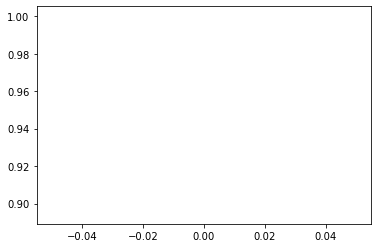

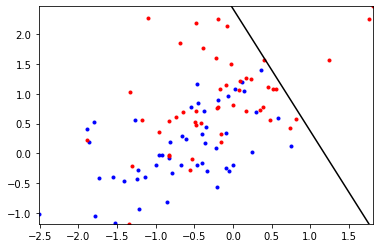

[-1.17076348  0.99092925  0.4831572 ]  =>  0.8944895183045427  /  1.0


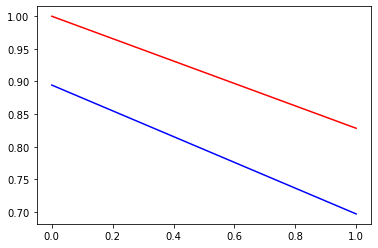

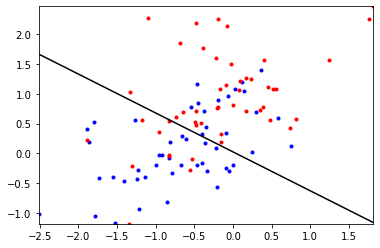

[-0.03267402  0.87264058  1.33781425]  =>  0.6969960182761483  /  0.8282828282828283


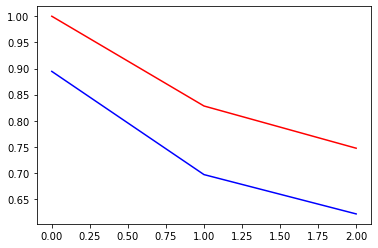

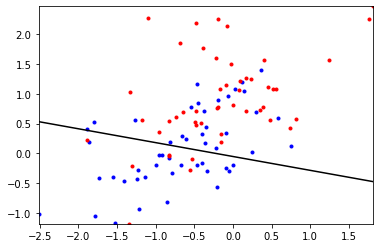

[0.02904712 0.1280565  0.55111263]  =>  0.6217571418682813  /  0.7474747474747475


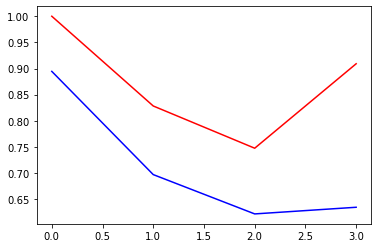

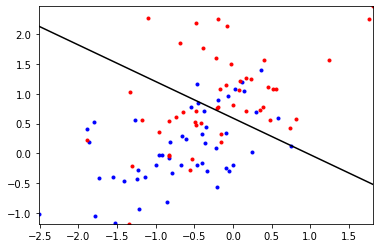

[-0.50553267  0.52535352  0.85649814]  =>  0.6344894103077264  /  0.9090909090909091


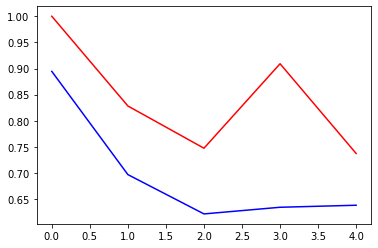

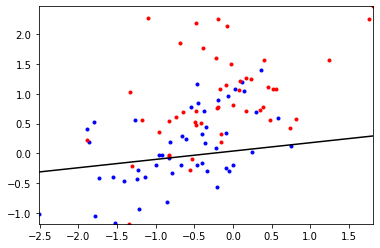

[-0.02679573 -0.09748095  0.69789863]  =>  0.6383516577483244  /  0.7373737373737373


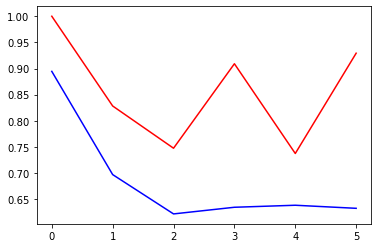

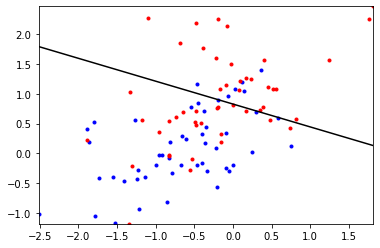

[-0.57109386  0.26513579  0.69149084]  =>  0.6324789742269517  /  0.9292929292929293


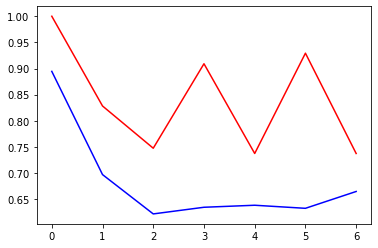

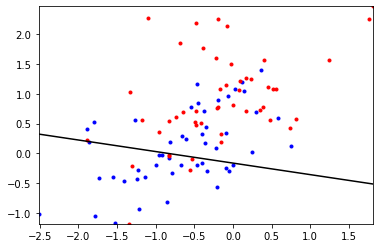

[0.18122976 0.21484798 1.1102612 ]  =>  0.6646884960108937  /  0.7373737373737373


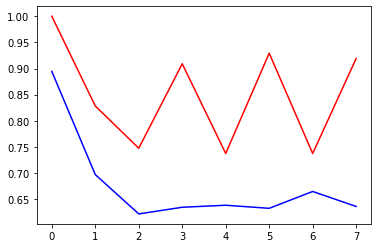

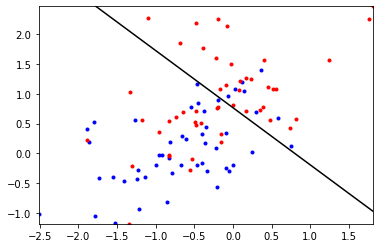

[-0.43069326  0.53988315  0.56338216]  =>  0.6360002628944598  /  0.9191919191919192


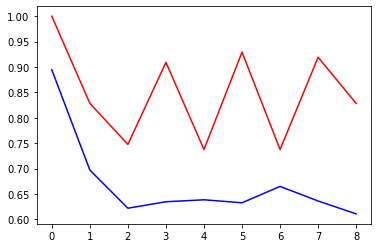

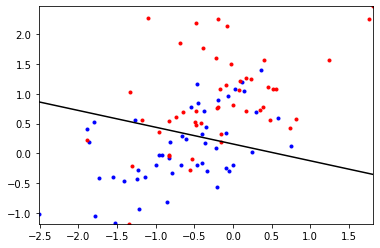

[-0.10412429  0.18691981  0.66482938]  =>  0.6105397944969154  /  0.8282828282828283


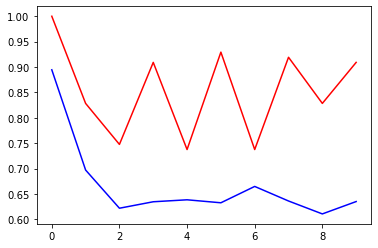

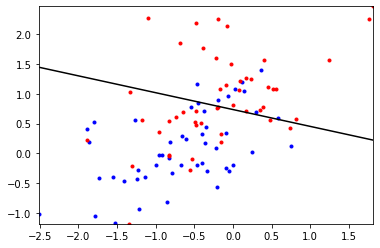

[-0.2575099   0.09912962  0.35086543]  =>  0.6348939361062833  /  0.9090909090909091


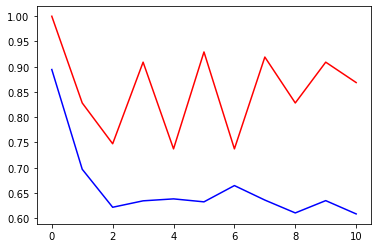

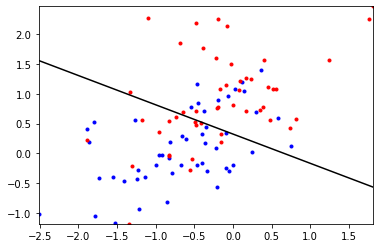

[-0.24248917  0.36805325  0.75022571]  =>  0.6085776519792678  /  0.8686868686868687


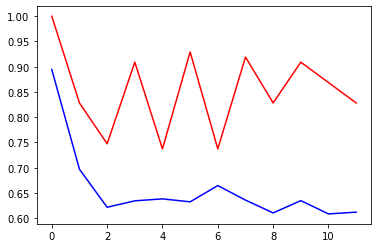

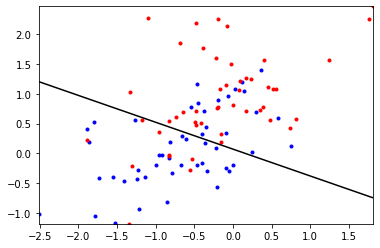

[-0.05805501  0.37008878  0.82192088]  =>  0.6120418344832799  /  0.8282828282828283


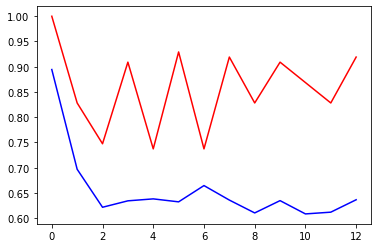

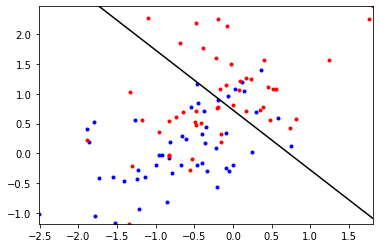

[-0.41758281  0.57765077  0.57558211]  =>  0.6366314458082671  /  0.9191919191919192


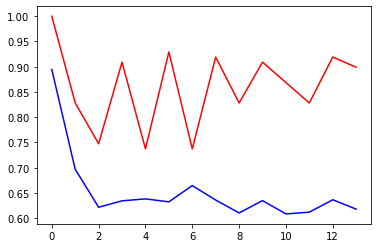

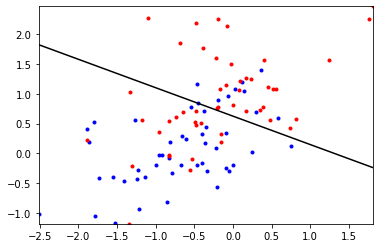

[-0.41108053  0.31422901  0.65939693]  =>  0.6180358711240246  /  0.898989898989899


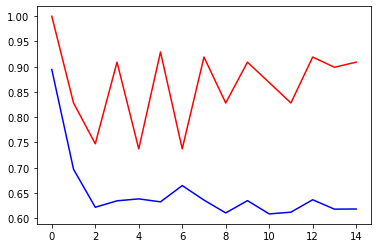

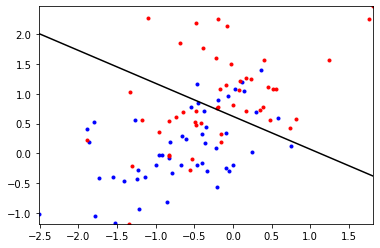

[-0.38898807  0.3464082   0.62705417]  =>  0.6183079451369508  /  0.9090909090909091


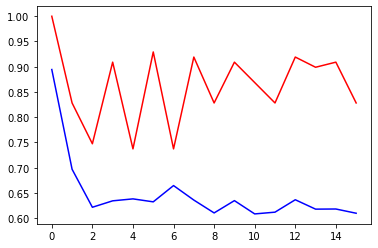

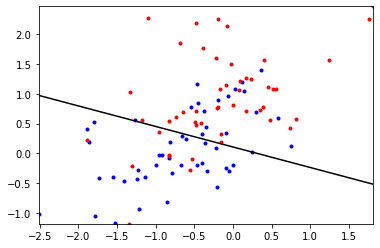

[-0.08076624  0.26024346  0.7562343 ]  =>  0.6099239423448937  /  0.8282828282828283


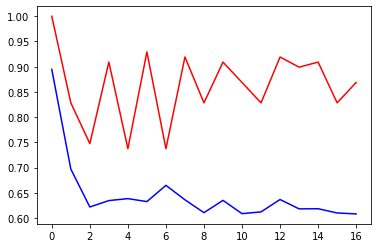

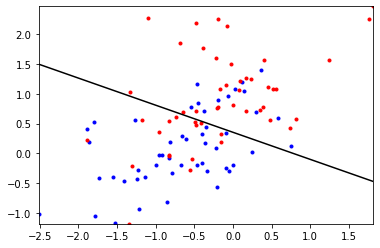

[-0.24368695  0.31373108  0.69058812]  =>  0.6080387553684562  /  0.8686868686868687


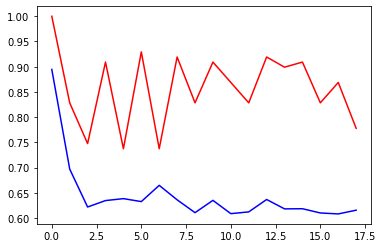

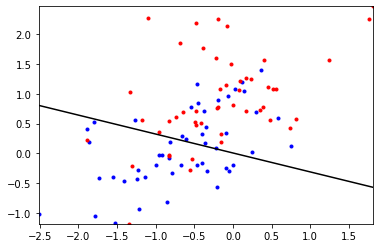

[-0.00488133  0.25267446  0.79584753]  =>  0.615430392706713  /  0.7777777777777778


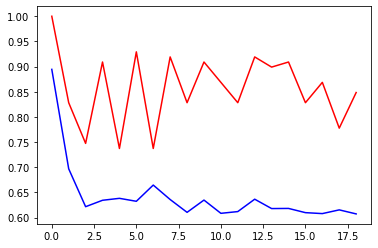

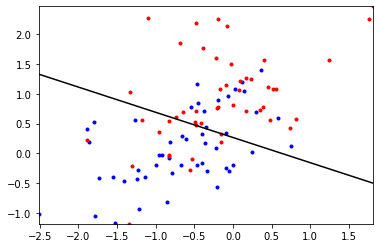

[-0.17562631  0.27921257  0.66093275]  =>  0.60740187140385  /  0.8484848484848485


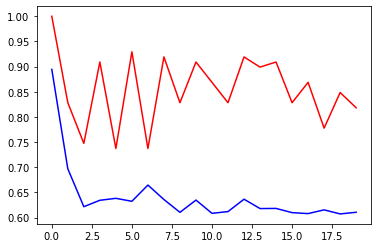

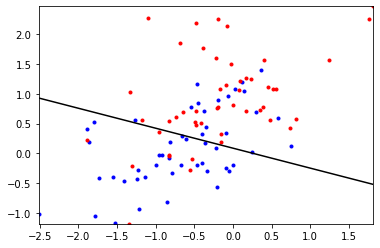

[-0.0586981   0.22650334  0.67695704]  =>  0.6106537561001361  /  0.8181818181818182


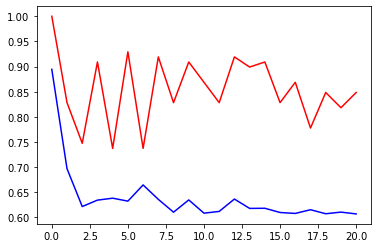

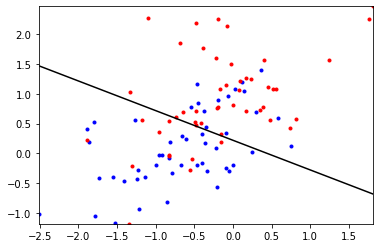

[-0.14630426  0.33230545  0.6683336 ]  =>  0.6070857706191358  /  0.8484848484848485


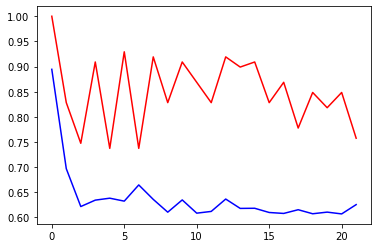

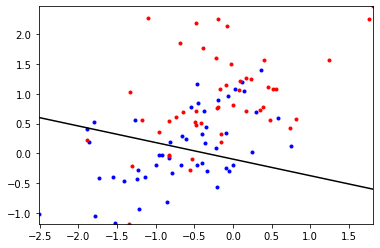

[0.081203   0.233114   0.83904916]  =>  0.6255657126989955  /  0.7575757575757576


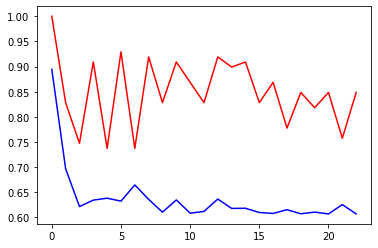

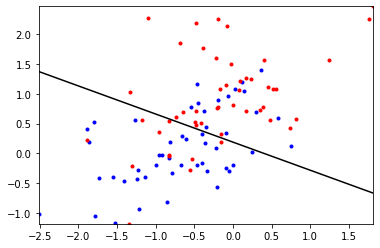

[-0.13240304  0.3318492   0.70440078]  =>  0.6071497948334414  /  0.8484848484848485


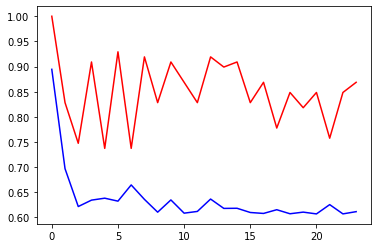

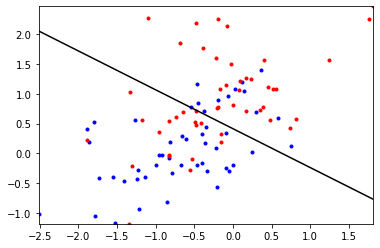

[-0.25859798  0.40823997  0.62636679]  =>  0.6115901072326232  /  0.8686868686868687


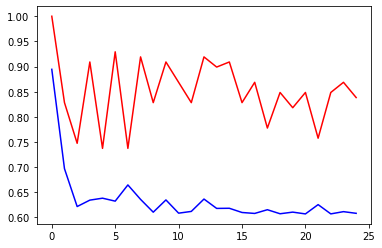

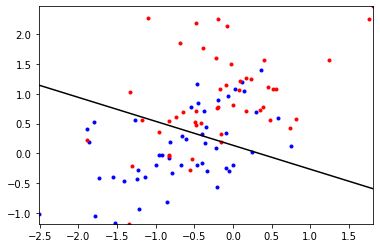

[-0.09248945  0.27522398  0.68523239]  =>  0.6082779895029695  /  0.8383838383838383


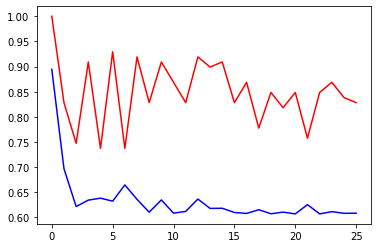

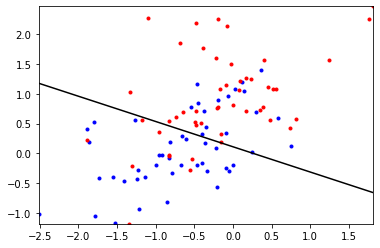

[-0.07626388  0.29306987  0.69172407]  =>  0.6084749216350165  /  0.8282828282828283


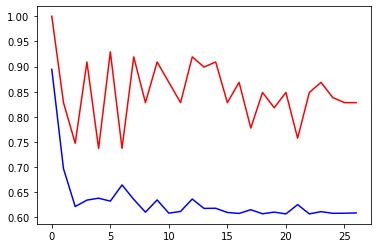

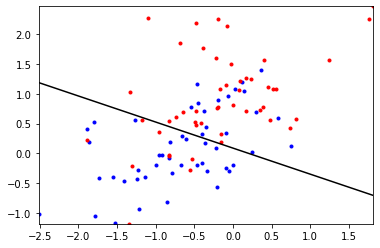

[-0.06355746  0.31637523  0.72405787]  =>  0.6090015743430839  /  0.8282828282828283


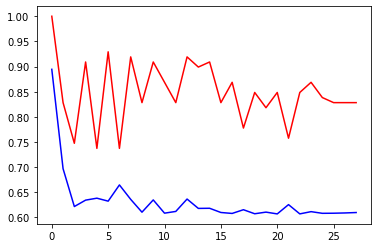

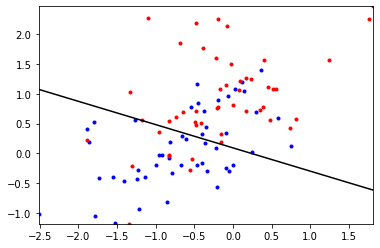

[-0.06989538  0.29746808  0.76229089]  =>  0.6098295546729342  /  0.8282828282828283


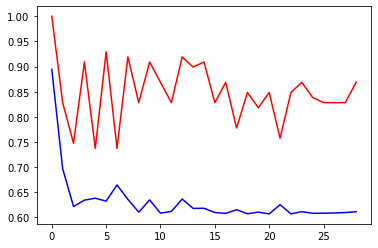

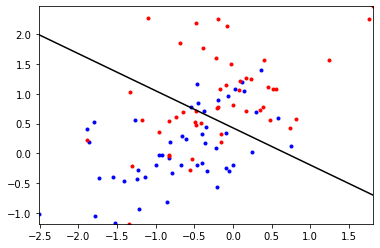

[-0.2540608  0.3701011  0.5949938]  =>  0.6114799733691905  /  0.8686868686868687


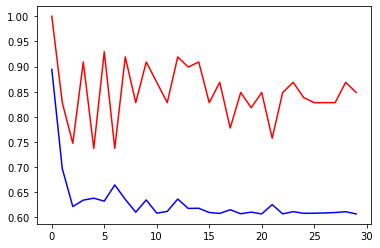

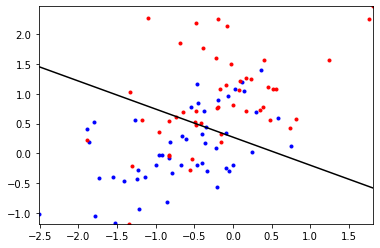

[-0.18842239  0.3266049   0.694181  ]  =>  0.6071093148762781  /  0.8484848484848485


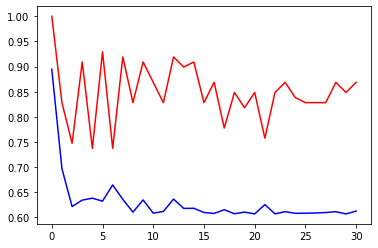

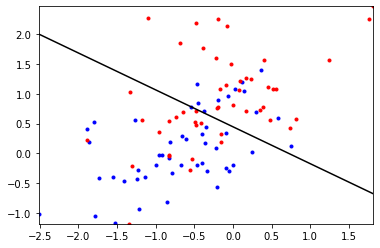

[-0.29790136  0.41406369  0.66931014]  =>  0.6126809121968775  /  0.8686868686868687


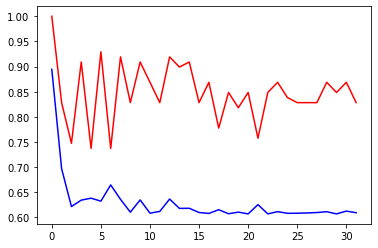

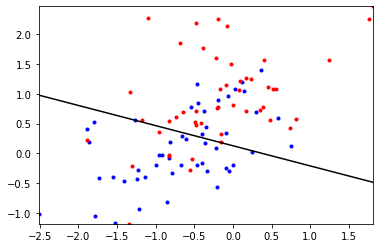

[-0.0960107   0.25524737  0.75539905]  =>  0.6094608012726223  /  0.8282828282828283


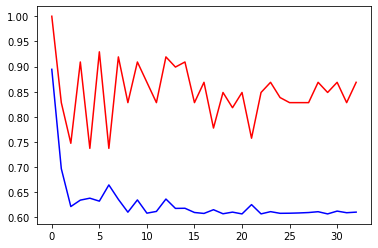

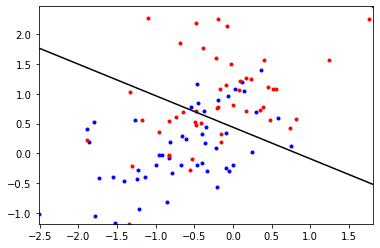

[-0.27454092  0.33166197  0.62755185]  =>  0.6106412283241665  /  0.8686868686868687


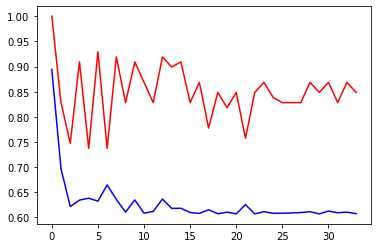

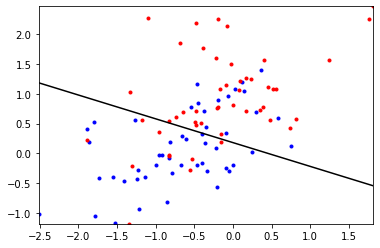

[-0.13160207  0.29188682  0.73167158]  =>  0.607579971313715  /  0.8484848484848485


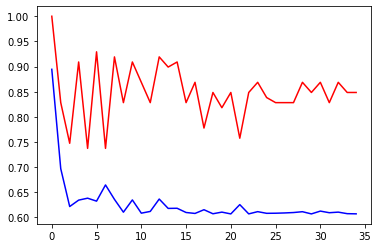

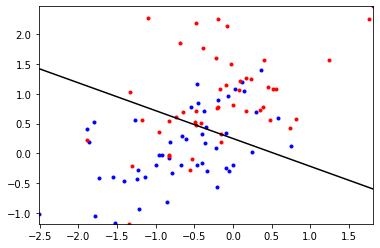

[-0.18191533  0.34156332  0.73190621]  =>  0.6072285102991342  /  0.8484848484848485


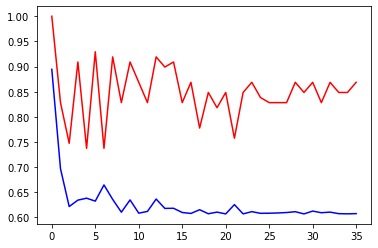

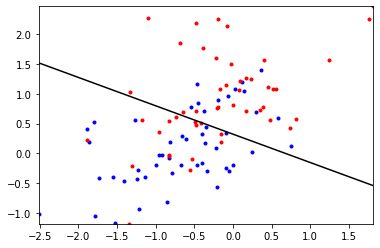

[-0.21495479  0.31786851  0.66848125]  =>  0.6076732919237211  /  0.8686868686868687


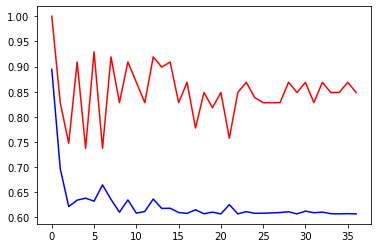

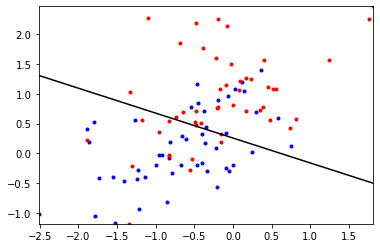

[-0.17526709  0.28533972  0.68305554]  =>  0.6071554738237468  /  0.8484848484848485


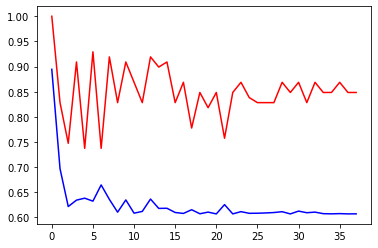

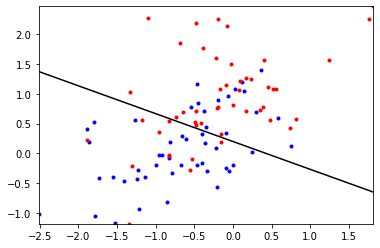

[-0.14377905  0.33834075  0.72475647]  =>  0.6072138982937041  /  0.8484848484848485


In [15]:
learner2.train(XB,YB,regul=2,alpha=0.05)

## Q10.
The major differences are
1. L2 norm is square, so it puts more emphasis on high parameters. For example, for learner2, L1 norm gives \[-0.14611992  0.2370104   0.86879008\] while L2 norm gives \[-0.25095201  0.32953775  0.69483565\]. we can see that L2 norm punishes more on high parameters(0.86->0.69) while less on low parameters(0.14->0.25, 0.23->0.32)
2. L1 norm can perform feature selection, which mearns it allows some features become 0 while others become larger. However, this property is not useful here because in our case, three features are important.
3. L1 regularization is robust to outliers, L2 regularization is not. 

I think first dataset is better in L2 regularization because it can be separated well, and it have no outliers. L2 norm can give better results on regularizing parameters. While the second model is better in L1 regularization because there were some outliers in the dataset.